In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import math
import pprint
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error

In [169]:
data = pd.read_csv('AAPL_sent_news.csv')

In [170]:
data['date']= data['publication_date']
#data['date']= pd.to_datetime(data.publication_date,format='%Y-%m-%d')
#data =data.set_index['date']
#data = date.drop(['publication_date'], axis=1)

In [171]:
data['date']= pd.to_datetime(data.publication_date,format='%Y-%m-%d')

In [172]:
data = data.set_index('date')

In [173]:
data = data.drop(['publication_date'], axis=1)

In [174]:
data[:100]

,compound,headline,neg,neu,pos,label
date,,,,,,
2016-05-24 00:17:38,-0.2960,Wall Street dips; Apple gain fails to offset r...,0.350,0.438,0.212,-1
2016-05-24 08:42:12,0.6318,More challenges than cheer for Apple chief on ...,0.000,0.608,0.392,1
2016-05-25 17:48:27,0.0000,India says Apple must sell locally-sourced goo...,0.000,1.000,0.000,0
2016-05-30 17:05:39,0.0000,India discussing Apple's request for FDI rules...,0.000,1.000,0.000,0
2016-06-01 08:29:12,0.0000,Apple plans to sell $1 bln of 30-yr bonds in T...,0.000,1.000,0.000,0
2016-06-02 20:16:42,0.4019,S&P 500 closes at seven-month high on data boost,0.000,0.748,0.252,1
2016-06-20 12:40:46,0.0000,India opens the door for Apple retail with new...,0.000,1.000,0.000,0
2016-06-22 03:12:40,-0.3818,Samsung takes fight to Apple with mobile walle...,0.245,0.755,0.000,-1
2016-06-23 10:22:07,0.0000,High-end smartphone market set to grow in Indi...,0.000,1.000,0.000,0


In [175]:
news_daily = data.resample('D').mean()

In [176]:
# Resample the full dataframe to monthly timeframe
#news_daily = data.resample('D').mean()



In [177]:
news_daily.fillna(0, inplace=True)
news_daily.head()

,compound,neg,neu,pos,label
date,,,,,
2016-05-24,0.1679,0.175,0.523,0.302,0.0
2016-05-25,0.0000,0.000,1.000,0.000,0.0
2016-05-26,0.0000,0.000,0.000,0.000,0.0
2016-05-27,0.0000,0.000,0.000,0.000,0.0
2016-05-28,0.0000,0.000,0.000,0.000,0.0


In [178]:
news_daily=news_daily.loc['2016-07-01':'2019-07-01']
news_daily.head()

,compound,neg,neu,pos,label
date,,,,,
2016-07-01,0.0,0.0,0.0,0.0,0.0
2016-07-02,0.0,0.0,0.0,0.0,0.0
2016-07-03,0.0,0.0,0.0,0.0,0.0
2016-07-04,0.0,0.0,0.0,0.0,0.0
2016-07-05,0.0,0.0,0.0,0.0,0.0


In [179]:
news_daily.describe()

,compound,neg,neu,pos,label
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,0.047188,0.061458,0.820976,0.091108,0.101900
std,0.082155,0.032604,0.142737,0.040458,0.184585
min,-0.476700,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,0.043086,0.818494,0.070792,0.000000
50%,0.045771,0.059887,0.845201,0.088604,0.100000
75%,0.089102,0.077225,0.868185,0.108849,0.200000
max,0.468850,0.280667,1.000000,0.316000,1.000000


### Fundamental Data

In [180]:
fund = pd.read_csv('AAPL_Fund.csv')
fund.head()

,date,marketcap,pricetobook,pricetoearnings,dividendyield,earningsyield,nopat,freecashflow,roe,ebitdagrowth,...,ebitda,totalassets,totalliabilities,debt,netincome,netcashfromoperatingactivities,netcashfrominvestingactivities,netcashfromfinancingactivities,longterminvestments,one_yr_monthly_beta
0,01/07/2019,9.270000e+11,9.6148,16.6516,0.018308,0.060054,55547452228,43960452228,0.491282,0.006515,...,79258000000,3.420000e+11,2.360000e+11,1.130000e+11,57170000000,71856000000,20138000000,-97236000000,1.450000e+11,1.3855
1,28/06/2019,9.300000e+11,8.7885,16.2734,0.018644,0.061450,55547452228,43960452228,0.491282,0.006515,...,79258000000,3.420000e+11,2.360000e+11,1.130000e+11,57170000000,71856000000,20138000000,-97236000000,1.450000e+11,1.3855
2,27/06/2019,9.390000e+11,8.8693,16.4231,0.018474,0.060890,55547452228,43960452228,0.491282,0.006515,...,79258000000,3.420000e+11,2.360000e+11,1.130000e+11,57170000000,71856000000,20138000000,-97236000000,1.450000e+11,1.3553
3,26/06/2019,9.390000e+11,8.8720,16.4280,0.018468,0.060872,55547452228,43960452228,0.491282,0.006515,...,79258000000,3.420000e+11,2.360000e+11,1.130000e+11,57170000000,71856000000,20138000000,-97236000000,1.450000e+11,1.3553
4,25/06/2019,9.190000e+11,8.6842,16.0802,0.018868,0.062188,55547452228,43960452228,0.491282,0.006515,...,79258000000,3.420000e+11,2.360000e+11,1.130000e+11,57170000000,71856000000,20138000000,-97236000000,1.450000e+11,1.3553


In [181]:
fund['date']= pd.to_datetime(fund.date,format='%d/%m/%Y')

In [182]:

fund.index =fund['date']

In [183]:
fund=fund.loc['2019-07-01':'2016-07-01']

In [184]:
fund.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2019-07-01 to 2016-07-01
Data columns (total 35 columns):
date                              754 non-null datetime64[ns]
marketcap                         754 non-null float64
pricetobook                       754 non-null float64
pricetoearnings                   754 non-null float64
dividendyield                     754 non-null float64
earningsyield                     754 non-null float64
nopat                             754 non-null int64
freecashflow                      754 non-null int64
roe                               754 non-null float64
ebitdagrowth                      754 non-null float64
ebitdamargin                      754 non-null float64
cashdividendspershare             754 non-null float64
bookvaluepershare                 754 non-null float64
capex                             754 non-null int64
currentratio                      754 non-null float64
debttoequity                      754 non-null flo

### Price analysis

In [185]:
df_price = pd.read_csv('apple_price.csv')

In [186]:
df_price['date']= df_price['date']
df_price['date']=pd.to_datetime(df_price.date,format='%Y-%m-%d')
df_price.index =df_price['date']

In [187]:
#df_price = df_price.drop(['date'], axis=1)

In [188]:
df_price.head()

,Unnamed: 0,adj_close,adj_high,adj_low,adj_open,adj_volume,close,date,frequency,high,intraperiod,low,open,volume
date,,,,,,,,,,,,,,
2019-08-06,0,197.00,198.067,194.0400,196.31,35824787.0,197.00,2019-08-06,daily,198.067,False,194.0400,196.31,35824787.0
2019-08-05,1,193.34,198.649,192.5800,197.99,52392969.0,193.34,2019-08-05,daily,198.649,False,192.5800,197.99,52392969.0
2019-08-02,2,204.02,206.430,201.6300,205.53,40862122.0,204.02,2019-08-02,daily,206.430,False,201.6300,205.53,40862122.0
2019-08-01,3,208.43,218.030,206.7435,213.90,54017922.0,208.43,2019-08-01,daily,218.030,False,206.7435,213.90,54017922.0
2019-07-31,4,213.04,221.370,211.3000,216.42,69281361.0,213.04,2019-07-31,daily,221.370,False,211.3000,216.42,69281361.0


In [189]:
df_price=df_price[::-1]

In [190]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1200 entries, 2014-10-29 to 2019-08-06
Data columns (total 14 columns):
Unnamed: 0     1200 non-null int64
adj_close      1200 non-null float64
adj_high       1200 non-null float64
adj_low        1200 non-null float64
adj_open       1200 non-null float64
adj_volume     1200 non-null float64
close          1200 non-null float64
date           1200 non-null datetime64[ns]
frequency      1200 non-null object
high           1200 non-null float64
intraperiod    1200 non-null bool
low            1200 non-null float64
open           1200 non-null float64
volume         1200 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(10), int64(1), object(1)
memory usage: 132.4+ KB


In [191]:
import talib
for n in [14, 30, 50, 200]:

    # Create the moving average indicator and divide by Adj_Close
    df_price['ma' + str(n)] = talib.SMA(df_price['adj_close'].values,
                              timeperiod=n) / df_price['adj_close']
    # Create the RSI indicator
    df_price['rsi' + str(n)] = talib.RSI(df_price['adj_close'].values, timeperiod=n)

In [192]:
df_price=df_price.loc['2016-07-01':'2019-07-01']

In [193]:
df_price.ma200

date
2016-07-01    1.084903
2016-07-05    1.094279
2016-07-06    1.087248
2016-07-07    1.081692
2016-07-08    1.072639
2016-07-11    1.068519
2016-07-12    1.062883
2016-07-13    1.068090
2016-07-14    1.046729
2016-07-15    1.046401
2016-07-18    1.034974
2016-07-19    1.034159
2016-07-20    1.032793
2016-07-21    1.037815
2016-07-22    1.045362
2016-07-25    1.058936
2016-07-26    1.065700
2016-07-27    1.000332
2016-07-28    0.986741
2016-07-29    0.987692
2016-08-01    0.970441
2016-08-02    0.984754
2016-08-03    0.972393
2016-08-04    0.966257
2016-08-05    0.951601
2016-08-08    0.943647
2016-08-09    0.939635
2016-08-10    0.946285
2016-08-11    0.946670
2016-08-12    0.944298
                ...   
2019-05-20    1.042291
2019-05-21    1.022211
2019-05-22    1.042971
2019-05-23    1.060352
2019-05-24    1.063740
2019-05-28    1.067430
2019-05-29    1.071745
2019-05-30    1.065463
2019-05-31    1.084224
2019-06-03    1.094316
2019-06-04    1.054910
2019-06-05    1.037375
2019-0

In [194]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2016-07-01 to 2019-07-01
Data columns (total 22 columns):
Unnamed: 0     754 non-null int64
adj_close      754 non-null float64
adj_high       754 non-null float64
adj_low        754 non-null float64
adj_open       754 non-null float64
adj_volume     754 non-null float64
close          754 non-null float64
date           754 non-null datetime64[ns]
frequency      754 non-null object
high           754 non-null float64
intraperiod    754 non-null bool
low            754 non-null float64
open           754 non-null float64
volume         754 non-null float64
ma14           754 non-null float64
rsi14          754 non-null float64
ma30           754 non-null float64
rsi30          754 non-null float64
ma50           754 non-null float64
rsi50          754 non-null float64
ma200          754 non-null float64
rsi200         754 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(18), int64(1), object(1)
memory usage: 

In [195]:
#df.join(other, lsuffix='_caller', rsuffix='_other')
df_price = df_price.join(news_daily['compound'])
#full_df = pd.merge(df_price,news_daily['compound'],how='left')

In [196]:
df_price=pd.merge(df_price,fund,how='outer',on='date')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: FutureWarning: 'date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


In [197]:
df_price.index =df_price['date']

In [198]:
df_price.head()

,Unnamed: 0,adj_close,adj_high,adj_low,adj_open,adj_volume,close,date,frequency,high,...,ebitda,totalassets,totalliabilities,debt,netincome,netcashfromoperatingactivities,netcashfrominvestingactivities,netcashfromfinancingactivities,longterminvestments,one_yr_monthly_beta
date,,,,,,,,,,,,,,,,,,,,,
2016-07-01,778,91.258871,91.806101,90.725917,90.878190,26026540.0,95.89,2016-07-01,daily,96.465,...,75322000000,3.060000e+11,1.790000e+11,8.493500e+10,47797000000,63173000000,-39955000000,-20300000000,1.700000e+11,1.5961
2016-07-05,777,90.402338,90.792537,89.897935,90.783020,27705210.0,94.99,2016-07-05,daily,95.400,...,75322000000,3.060000e+11,1.790000e+11,8.493500e+10,47797000000,63173000000,-39955000000,-20300000000,1.700000e+11,1.5961
2016-07-06,776,90.916258,91.039980,89.812282,90.031174,30949090.0,95.53,2016-07-06,daily,95.660,...,75322000000,3.060000e+11,1.790000e+11,8.493500e+10,47797000000,63173000000,-39955000000,-20300000000,1.700000e+11,1.5961
2016-07-07,775,91.306457,91.839411,91.001911,91.078048,25139558.0,95.94,2016-07-07,daily,96.500,...,75322000000,3.060000e+11,1.790000e+11,8.493500e+10,47797000000,63173000000,-39955000000,-20300000000,1.700000e+11,1.5961
2016-07-08,774,92.010717,92.210575,91.411144,91.829894,28912103.0,96.68,2016-07-08,daily,96.890,...,75322000000,3.060000e+11,1.790000e+11,8.493500e+10,47797000000,63173000000,-39955000000,-20300000000,1.700000e+11,1.5961


In [199]:
df_price['Unnamed: 0'].drop

<bound method Series.drop of date
2016-07-01    778
2016-07-05    777
2016-07-06    776
2016-07-07    775
2016-07-08    774
2016-07-11    773
2016-07-12    772
2016-07-13    771
2016-07-14    770
2016-07-15    769
2016-07-18    768
2016-07-19    767
2016-07-20    766
2016-07-21    765
2016-07-22    764
2016-07-25    763
2016-07-26    762
2016-07-27    761
2016-07-28    760
2016-07-29    759
2016-08-01    758
2016-08-02    757
2016-08-03    756
2016-08-04    755
2016-08-05    754
2016-08-08    753
2016-08-09    752
2016-08-10    751
2016-08-11    750
2016-08-12    749
             ... 
2019-05-20     54
2019-05-21     53
2019-05-22     52
2019-05-23     51
2019-05-24     50
2019-05-28     49
2019-05-29     48
2019-05-30     47
2019-05-31     46
2019-06-03     45
2019-06-04     44
2019-06-05     43
2019-06-06     42
2019-06-07     41
2019-06-10     40
2019-06-11     39
2019-06-12     38
2019-06-13     37
2019-06-14     36
2019-06-17     35
2019-06-18     34
2019-06-19     33
2019-06-20  

In [200]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2016-07-01 to 2019-07-01
Data columns (total 57 columns):
Unnamed: 0                        754 non-null int64
adj_close                         754 non-null float64
adj_high                          754 non-null float64
adj_low                           754 non-null float64
adj_open                          754 non-null float64
adj_volume                        754 non-null float64
close                             754 non-null float64
date                              754 non-null datetime64[ns]
frequency                         754 non-null object
high                              754 non-null float64
intraperiod                       754 non-null bool
low                               754 non-null float64
open                              754 non-null float64
volume                            754 non-null float64
ma14                              754 non-null float64
rsi14                             754 non-null flo

In [201]:
df_price['ebitda'] = df_price['ebitda'].astype(float)

In [202]:
df_price.columns

Index(['Unnamed: 0', 'adj_close', 'adj_high', 'adj_low', 'adj_open',
       'adj_volume', 'close', 'date', 'frequency', 'high', 'intraperiod',
       'low', 'open', 'volume', 'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50',
       'rsi50', 'ma200', 'rsi200', 'compound', 'marketcap', 'pricetobook',
       'pricetoearnings', 'dividendyield', 'earningsyield', 'nopat',
       'freecashflow', 'roe', 'ebitdagrowth', 'ebitdamargin',
       'cashdividendspershare', 'bookvaluepershare', 'capex', 'currentratio',
       'debttoequity', 'epsgrowth', 'investedcapitalgrowth', 'fcffgrowth',
       'finleverage', 'netincomegrowth', 'roa', 'revenuegrowth', 'basiceps',
       'operatingrevenue', 'ebitda', 'totalassets', 'totalliabilities', 'debt',
       'netincome', 'netcashfromoperatingactivities',
       'netcashfrominvestingactivities', 'netcashfromfinancingactivities',
       'longterminvestments', 'one_yr_monthly_beta'],
      dtype='object')

In [203]:
fundamentals=['marketcap', 'pricetobook','pricetoearnings', 'dividendyield', 'earningsyield', 'nopat','freecashflow', 'roe', 'ebitdagrowth', 'ebitdamargin',
       'cashdividendspershare', 'bookvaluepershare', 'capex', 'currentratio',
       'debttoequity', 'epsgrowth', 'investedcapitalgrowth', 'fcffgrowth',
       'finleverage', 'netincomegrowth', 'roa', 'revenuegrowth', 'basiceps',
       'operatingrevenue', 'ebitda', 'totalassets', 'totalliabilities', 'debt',
       'netincome', 'netcashfromoperatingactivities',
       'netcashfrominvestingactivities', 'netcashfromfinancingactivities',
       'longterminvestments','one_yr_monthly_beta']

In [204]:
for column in fundamentals:
    df_price[column] = df_price[column].astype(float)

In [205]:
df_price.head()

,Unnamed: 0,adj_close,adj_high,adj_low,adj_open,adj_volume,close,date,frequency,high,...,ebitda,totalassets,totalliabilities,debt,netincome,netcashfromoperatingactivities,netcashfrominvestingactivities,netcashfromfinancingactivities,longterminvestments,one_yr_monthly_beta
date,,,,,,,,,,,,,,,,,,,,,
2016-07-01,778,91.258871,91.806101,90.725917,90.878190,26026540.0,95.89,2016-07-01,daily,96.465,...,7.532200e+10,3.060000e+11,1.790000e+11,8.493500e+10,4.779700e+10,6.317300e+10,-3.995500e+10,-2.030000e+10,1.700000e+11,1.5961
2016-07-05,777,90.402338,90.792537,89.897935,90.783020,27705210.0,94.99,2016-07-05,daily,95.400,...,7.532200e+10,3.060000e+11,1.790000e+11,8.493500e+10,4.779700e+10,6.317300e+10,-3.995500e+10,-2.030000e+10,1.700000e+11,1.5961
2016-07-06,776,90.916258,91.039980,89.812282,90.031174,30949090.0,95.53,2016-07-06,daily,95.660,...,7.532200e+10,3.060000e+11,1.790000e+11,8.493500e+10,4.779700e+10,6.317300e+10,-3.995500e+10,-2.030000e+10,1.700000e+11,1.5961
2016-07-07,775,91.306457,91.839411,91.001911,91.078048,25139558.0,95.94,2016-07-07,daily,96.500,...,7.532200e+10,3.060000e+11,1.790000e+11,8.493500e+10,4.779700e+10,6.317300e+10,-3.995500e+10,-2.030000e+10,1.700000e+11,1.5961
2016-07-08,774,92.010717,92.210575,91.411144,91.829894,28912103.0,96.68,2016-07-08,daily,96.890,...,7.532200e+10,3.060000e+11,1.790000e+11,8.493500e+10,4.779700e+10,6.317300e+10,-3.995500e+10,-2.030000e+10,1.700000e+11,1.5961


### EDA

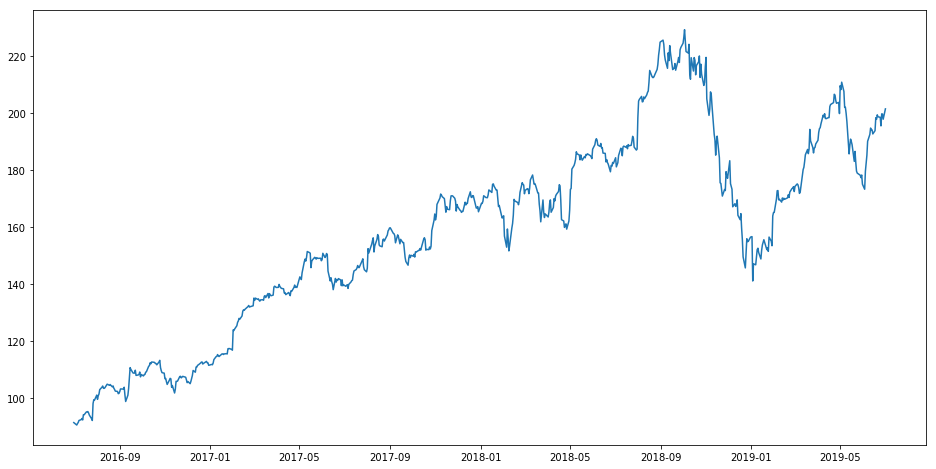

In [206]:
#plot
plt.figure(figsize=(16,8))
plt.plot(df_price['adj_close'], label='Close Price history')

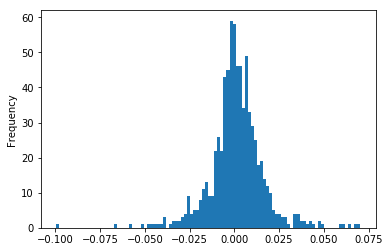

In [207]:
df_price['adj_close'].pct_change().plot.hist(bins=100)

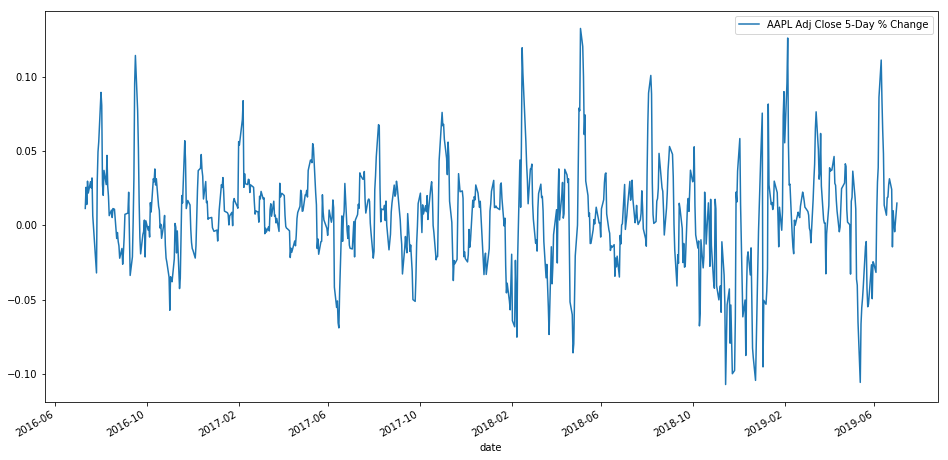

In [208]:
plt.figure(figsize=(16,8))
df_price['adj_close'].pct_change(5).plot(label='AAPL Adj Close 5-Day % Change',legend=True)

                     5d_close_pct  5d_close_future_pct
5d_close_pct             1.000000             0.058929
5d_close_future_pct      0.058929             1.000000


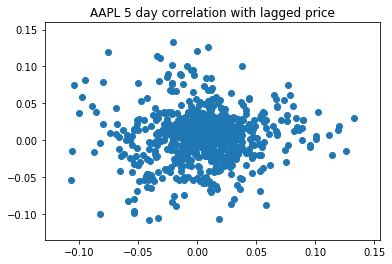

In [209]:
# Create 5-day % changes of Adj_Close for the current day, and 5 days in the future
df_price['5d_future_close'] = df_price['adj_close'].shift(-5)
df_price['5d_close_future_pct'] = df_price['5d_future_close'].pct_change(5)
df_price['5d_close_pct'] = df_price['adj_close'].pct_change(5)

# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_price[['5d_close_pct', '5d_close_future_pct']].corr()
print(corr)

# Scatter the current 5-day percent change vs the future 5-day percent change
plt.title('AAPL 5 day correlation with lagged price')
plt.scatter(df_price['5d_close_pct'], df_price['5d_close_future_pct'])
plt.show()

                     compound  5d_close_future_pct
compound              1.00000              0.00645
5d_close_future_pct   0.00645              1.00000


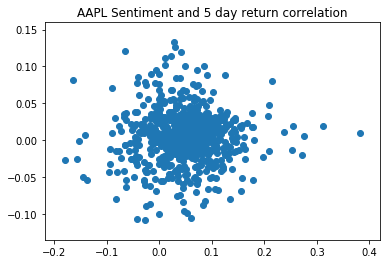

In [210]:
# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_price[['compound', '5d_close_future_pct']].corr()
print(corr)

# Scatter the current 5-day percent change vs the future 5-day percent change
plt.title('AAPL Sentiment and 5 day return correlation')
plt.scatter(df_price['compound'], df_price['5d_close_future_pct'])
plt.show()

                     1d_close_pct  1d_close_future_pct
1d_close_pct             1.000000             0.014947
1d_close_future_pct      0.014947             1.000000


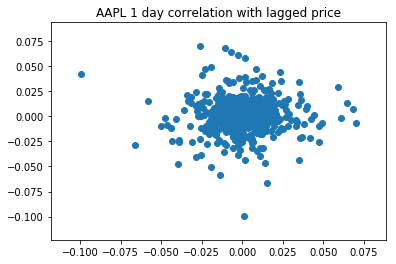

In [211]:
df_1 = df_price
# Create 5-day % changes of Adj_Close for the current day, and 5 days in the future
df_1['1d_future_close'] = df_1['adj_close'].shift(-1)
df_1['1d_close_future_pct'] = df_1['1d_future_close'].pct_change(1)
df_1['1d_close_pct'] = df_1['adj_close'].pct_change(1)

# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_1[['1d_close_pct', '1d_close_future_pct']].corr()
print(corr)
# Scatter the current 5-day percent change vs the future 5-day percent change
plt.title('AAPL 1 day correlation with lagged price')
plt.scatter(df_1['1d_close_pct'], df_1['1d_close_future_pct'])
plt.show()

                     compound  1d_close_future_pct
compound             1.000000             0.017024
1d_close_future_pct  0.017024             1.000000


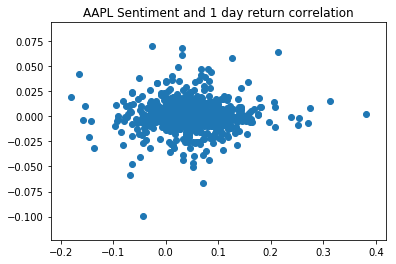

In [212]:
# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_1[['compound', '1d_close_future_pct']].corr()
print(corr)

# Scatter the current 5-day percent change vs the future 5-day percent change
plt.title('AAPL Sentiment and 1 day return correlation')
plt.scatter(df_1['compound'], df_1['1d_close_future_pct'])
plt.show()

                      30d_close_pct  30d_close_future_pct
30d_close_pct              1.000000             -0.061982
30d_close_future_pct      -0.061982              1.000000


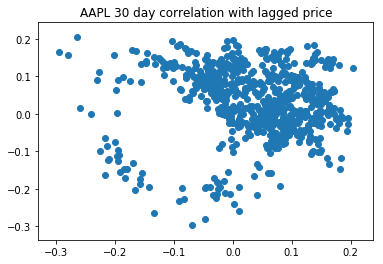

In [213]:
# Create 5-day % changes of Adj_Close for the current day, and 5 days in the future
df_30 = df_price
df_30['30d_future_close'] = df_price['adj_close'].shift(-30)
df_30['30d_close_future_pct'] = df_price['30d_future_close'].pct_change(30)
df_30['30d_close_pct'] = df_price['adj_close'].pct_change(30)

# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_30[['30d_close_pct', '30d_close_future_pct']].corr()
print(corr)
# Scatter the current 30-day percent change vs the future 5-day percent change
plt.title('AAPL 30 day correlation with lagged price')
plt.scatter(df_30['30d_close_pct'], df_30['30d_close_future_pct'])
plt.show()

                      compound  30d_close_future_pct
compound               1.00000              -0.11211
30d_close_future_pct  -0.11211               1.00000


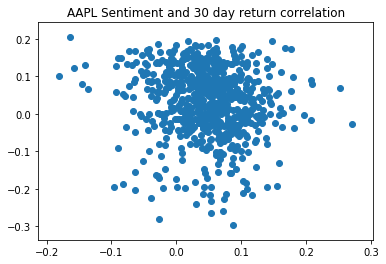

In [214]:
# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_30[['compound', '30d_close_future_pct']].corr()
print(corr)

# Scatter the current 5-day percent change vs the future 5-day percent change
plt.title('AAPL Sentiment and 30 day return correlation')
plt.scatter(df_30['compound'], df_30['30d_close_future_pct'])
plt.show()

In [215]:
df_price = df_price.drop(['Unnamed: 0'], axis =1)

In [216]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2016-07-01 to 2019-07-01
Data columns (total 65 columns):
adj_close                         754 non-null float64
adj_high                          754 non-null float64
adj_low                           754 non-null float64
adj_open                          754 non-null float64
adj_volume                        754 non-null float64
close                             754 non-null float64
date                              754 non-null datetime64[ns]
frequency                         754 non-null object
high                              754 non-null float64
intraperiod                       754 non-null bool
low                               754 non-null float64
open                              754 non-null float64
volume                            754 non-null float64
ma14                              754 non-null float64
rsi14                             754 non-null float64
ma30                              754 non-null f

In [217]:
#df_price['MACD'] = pd.Series(talib.MACD(df_price['adj_close'], fastperiod=12, slowperiod=26, signalperiod=9))
#df_price['STOCH'] = pd.Series(talib.STOCH(df_price['adj_high'].values,df_price['adj_low'].values,df_price['adj_close'].values,fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0))

In [218]:
#df_price[:50]

#df_price.drop(['MACD','STOCH'], axis =1)

In [219]:
feature_names = ['5d_close_pct']  # a list of the feature names for later

# Create moving averages and rsi for timeperiods of 14, 30, 50, and 200
for n in [14, 30, 50, 200]:

    
    
    
    # Add rsi and moving average to the feature name list
    feature_names = feature_names + ['ma' + str(n), 'rsi' + str(n)]

    

        

feature_names = feature_names + ['compound'] + fundamentals
print(feature_names)



['5d_close_pct', 'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50', 'rsi50', 'ma200', 'rsi200', 'compound', 'marketcap', 'pricetobook', 'pricetoearnings', 'dividendyield', 'earningsyield', 'nopat', 'freecashflow', 'roe', 'ebitdagrowth', 'ebitdamargin', 'cashdividendspershare', 'bookvaluepershare', 'capex', 'currentratio', 'debttoequity', 'epsgrowth', 'investedcapitalgrowth', 'fcffgrowth', 'finleverage', 'netincomegrowth', 'roa', 'revenuegrowth', 'basiceps', 'operatingrevenue', 'ebitda', 'totalassets', 'totalliabilities', 'debt', 'netincome', 'netcashfromoperatingactivities', 'netcashfrominvestingactivities', 'netcashfromfinancingactivities', 'longterminvestments', 'one_yr_monthly_beta']


In [220]:
# Create 2 new volume features, 1-day % change and 5-day SMA of the % change
new_features = ['Adj_Volume_1d_change', 'Adj_Volume_1d_change_SMA']
feature_names.extend(new_features)
df_price['Adj_Volume_1d_change'] = df_price['adj_volume'].pct_change()
df_price['Adj_Volume_1d_change_SMA'] = talib.SMA(df_price['Adj_Volume_1d_change'].values,
                                               timeperiod=5)


/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:778: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  a, weights = _ravel_and_check_weights(a, weights)


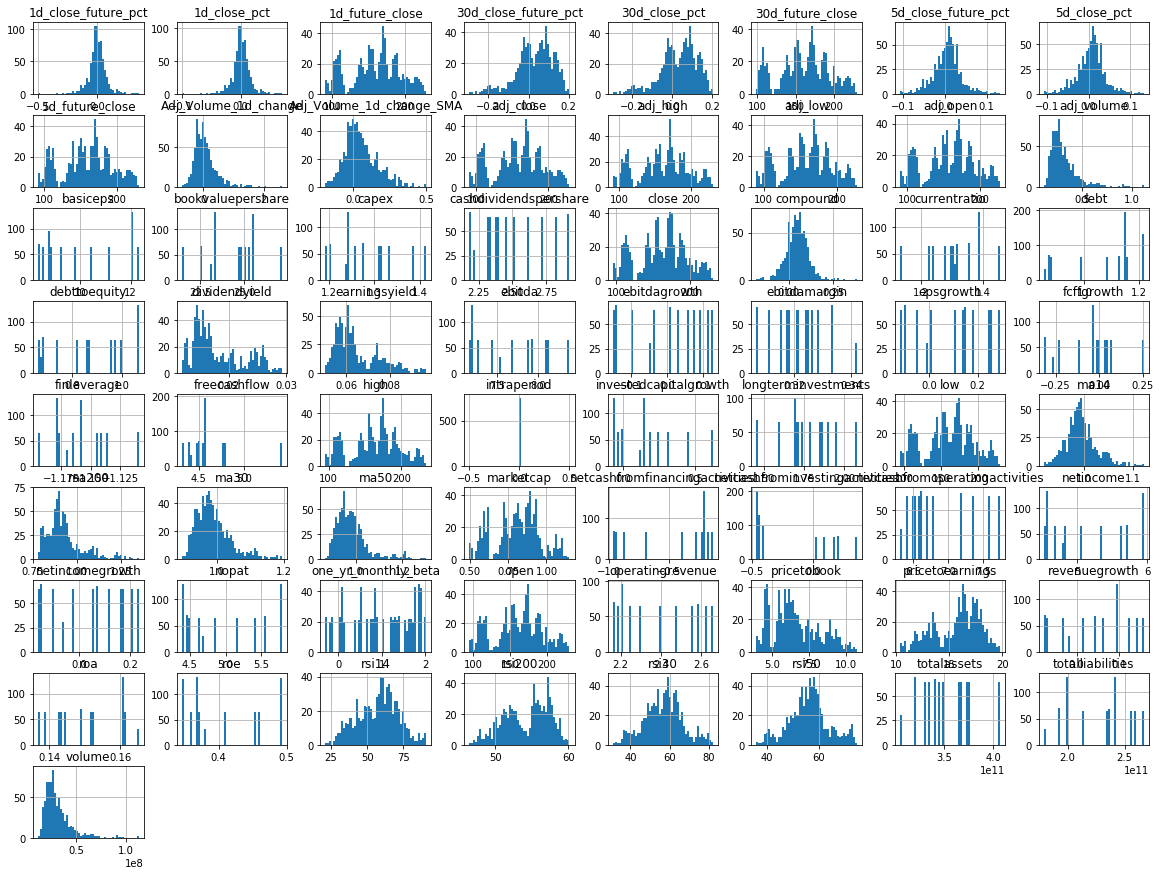

In [221]:
%matplotlib inline
import matplotlib.pyplot as plt
df_price.hist(bins=50, figsize=(20,15))
plt.show()

In [222]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2016-07-01 to 2019-07-01
Data columns (total 67 columns):
adj_close                         754 non-null float64
adj_high                          754 non-null float64
adj_low                           754 non-null float64
adj_open                          754 non-null float64
adj_volume                        754 non-null float64
close                             754 non-null float64
date                              754 non-null datetime64[ns]
frequency                         754 non-null object
high                              754 non-null float64
intraperiod                       754 non-null bool
low                               754 non-null float64
open                              754 non-null float64
volume                            754 non-null float64
ma14                              754 non-null float64
rsi14                             754 non-null float64
ma30                              754 non-null f

In [223]:
df_price.columns

Index(['adj_close', 'adj_high', 'adj_low', 'adj_open', 'adj_volume', 'close',
       'date', 'frequency', 'high', 'intraperiod', 'low', 'open', 'volume',
       'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50', 'rsi50', 'ma200', 'rsi200',
       'compound', 'marketcap', 'pricetobook', 'pricetoearnings',
       'dividendyield', 'earningsyield', 'nopat', 'freecashflow', 'roe',
       'ebitdagrowth', 'ebitdamargin', 'cashdividendspershare',
       'bookvaluepershare', 'capex', 'currentratio', 'debttoequity',
       'epsgrowth', 'investedcapitalgrowth', 'fcffgrowth', 'finleverage',
       'netincomegrowth', 'roa', 'revenuegrowth', 'basiceps',
       'operatingrevenue', 'ebitda', 'totalassets', 'totalliabilities', 'debt',
       'netincome', 'netcashfromoperatingactivities',
       'netcashfrominvestingactivities', 'netcashfromfinancingactivities',
       'longterminvestments', 'one_yr_monthly_beta', '5d_future_close',
       '5d_close_future_pct', '5d_close_pct', '1d_future_close',
       '1d_clos

In [224]:
# Drop all na values
df_price = df_price.dropna()

# Create features and targets
# use feature_names for features; 5d_close_future_pct for targets
features = df_price[feature_names]
targets = df_price['5d_close_future_pct']

# Create DataFrame from target column and feature columns
feat_targ_df = df_price[['5d_close_future_pct'] + feature_names]

# Calculate correlation matrix
corr = feat_targ_df.corr()
print(corr)

                                5d_close_future_pct  5d_close_pct      ma14  \
5d_close_future_pct                        1.000000      0.055376 -0.059810   
5d_close_pct                               0.055376      1.000000 -0.860901   
ma14                                      -0.059810     -0.860901  1.000000   
rsi14                                      0.058024      0.648437 -0.820652   
ma30                                      -0.091669     -0.664855  0.875395   
rsi30                                      0.018851      0.483587 -0.658183   
ma50                                      -0.067189     -0.517116  0.720603   
rsi50                                     -0.008415      0.386834 -0.544010   
ma200                                      0.069606     -0.244100  0.360755   
rsi200                                    -0.074154      0.220204 -0.319132   
compound                                  -0.003098      0.247415 -0.292243   
marketcap                                 -0.181857 

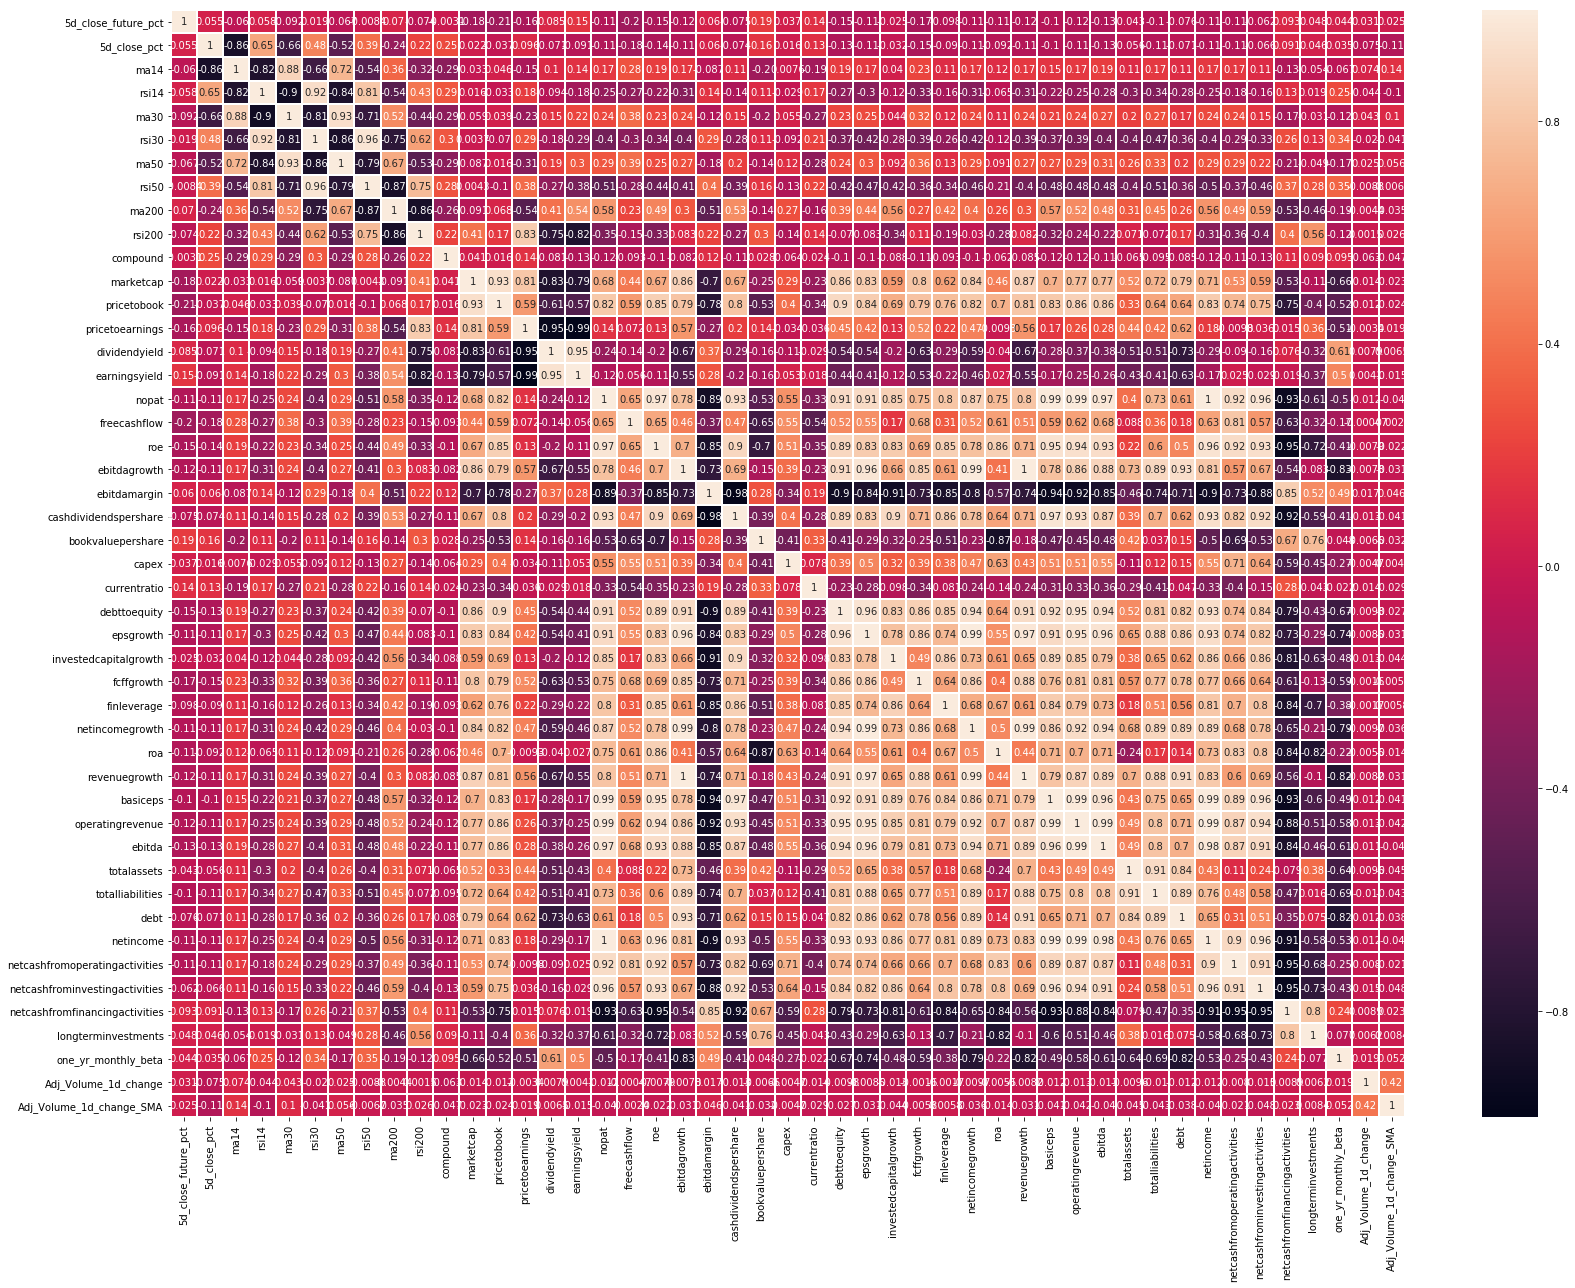

<Figure size 432x288 with 0 Axes>

In [225]:
# Plot heatmap of correlation matrix
plt.figure(figsize=(24, 18))
sns.heatmap(corr, annot=True,linewidths=1)
plt.yticks(rotation=0); plt.xticks(rotation=90)  # fix ticklabel directions
plt.tight_layout()  # fits plot area to the plot, "tightly"
plt.show()  # show the plot
plt.clf()  # clear the plot area

# Create a scatter plot of the most highly correlated variable with the target
#plt.scatter(df_price['ma200'], df_price['5d_close_future_pct'])
#plt.show()

In [226]:
# Calculate the correlation matrix and take the absolute value
corr_matrix = df_price.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.90)]

# Drop the features in the to_drop list
reduced_df = df_price.drop(to_drop, axis=1)

print("The reduced_df dataframe has {} columns".format(reduced_df.shape[1]))

The reduced_df dataframe has 33 columns


In [227]:
reduced_df.columns

Index(['date', 'frequency', 'intraperiod', 'volume', 'ma14', 'rsi50', 'ma200',
       'rsi200', 'compound', 'earningsyield', 'freecashflow',
       'bookvaluepershare', 'capex', 'currentratio', 'investedcapitalgrowth',
       'fcffgrowth', 'finleverage', 'roa', 'totalliabilities', 'debt',
       'netcashfromfinancingactivities', 'longterminvestments',
       'one_yr_monthly_beta', '5d_close_future_pct', '5d_close_pct',
       '1d_future_close', '1d_close_future_pct', '1d_close_pct',
       '30d_future_close', '30d_close_future_pct', '30d_close_pct',
       'Adj_Volume_1d_change', 'Adj_Volume_1d_change_SMA'],
      dtype='object')

In [228]:
feature_names=['volume', 'ma14', 'rsi50', 'ma200',
       'rsi200', 'compound',
       'pricetobook', 'dividendyield', 'freecashflow', 'capex',
       'currentratio', 'debttoequity', 'investedcapitalgrowth', 'fcffgrowth',
       'finleverage', 'netincomegrowth', 'roa', 'revenuegrowth',
       'operatingrevenue', 'netincome', 'netcashfromoperatingactivities',
       'netcashfromfinancingactivities', 'longterminvestments',
       'one_yr_monthly_beta',
       '5d_close_pct', 'Adj_Volume_1d_change', 'Adj_Volume_1d_change_SMA']

In [229]:
feature_names = ['compound',
       'marketcap', 'pricetobook', 'dividendyield', 'earningsyield',
       'ebitdamargin', 'cashdividendspershare', 'bookvaluepershare',
       'currentratio', 'debttoequity', 'fcffgrowth', 'finleverage',
       'revenuegrowth', 'operatingrevenue', 'ebitda', 'totalassets', 'debt',
       'netincome', 'netcashfromoperatingactivities',
       'netcashfrominvestingactivities', 'netcashfromfinancingactivities',
       'longterminvestments', 'one_yr_monthly_beta', '5d_close_pct', 'ma14', 'ma30', 'ma50', 'rsi50',
       'ma200', 'rsi200', 'Adj_Volume_1d_change', 'Adj_Volume_1d_change_SMA']

In [230]:
#feature_names = ['5d_close_pct', 'ma14','ma50', 'rsi50', 'ma200', 'rsi200', 'compound', 'pricetobook', 'pricetoearnings', 'dividendyield', 'earningsyield']
#feature_names = ['compound']
features = df_price[feature_names]
targets = reduced_df['5d_close_future_pct']





In [231]:
targets.describe()

count    694.000000
mean       0.004584
std        0.034045
min       -0.107160
25%       -0.013822
50%        0.007034
75%        0.022309
max        0.132516
Name: 5d_close_future_pct, dtype: float64

In [232]:
# Import the statsmodels library with the alias sm
import statsmodels.api as sm

# Add a constant to the features
linear_features = sm.add_constant(features)

# Create a size for the training set that is 85% of the total number of samples
train_size = int(0.80 * features.shape[0])
train_features = linear_features[:train_size]
train_targets = targets[:train_size]
test_features = linear_features[train_size:len(targets)]
test_targets = targets[train_size:len(targets)]
print(linear_features.shape, train_features.shape, test_features.shape)
print(linear_features.shape, train_features.shape, test_features.shape)

(694, 33) (555, 33) (139, 33)
(694, 33) (555, 33) (139, 33)


In [233]:
train_size

555

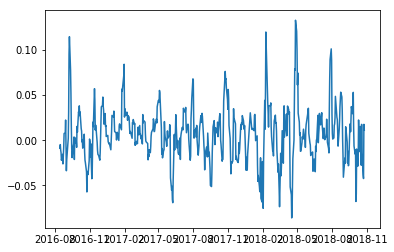

In [234]:
plt.plot(train_targets)

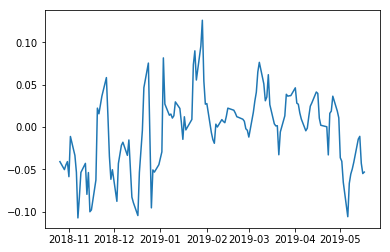

In [235]:
plt.plot(test_targets)

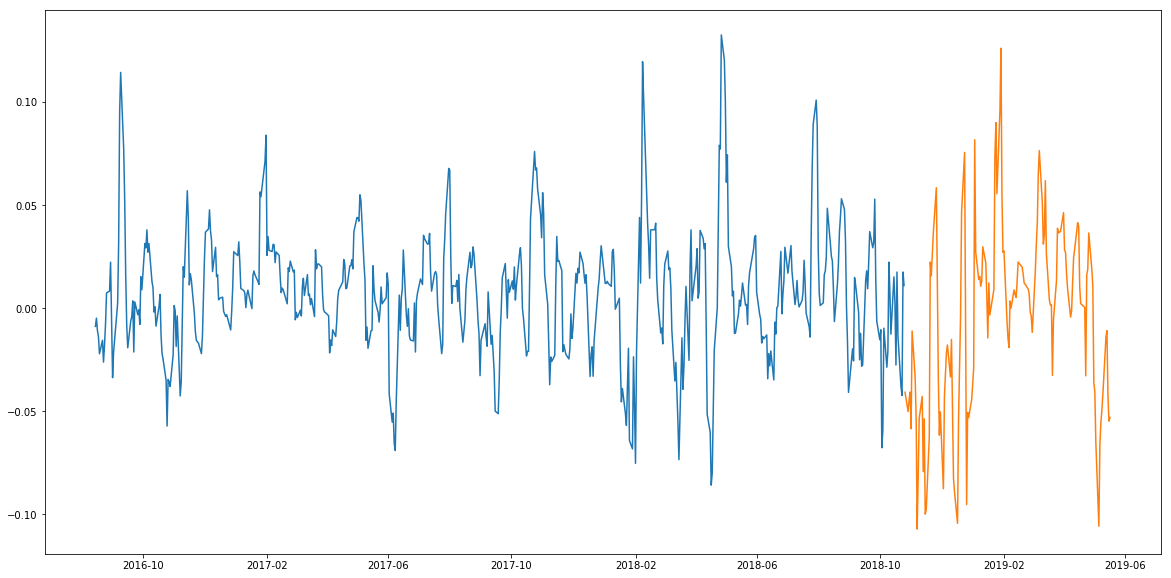

In [236]:
plt.figure(figsize=(20,10))
plt.plot(train_targets)
plt.plot(test_targets)
plt.show()

In [237]:
# Create the linear model and complete the least squares fit
model = sm.OLS(train_targets, train_features)
results = model.fit()  # fit the model
print(results.summary())

# examine pvalues
# Features with p <= 0.05 are typically considered significantly different from 0
print(results.pvalues)

# Make predictions from our model for train and test sets
train_predictions = results.predict(train_features)
test_predictions = results.predict(test_features)

                             OLS Regression Results                            
Dep. Variable:     5d_close_future_pct   R-squared:                       0.241
Model:                             OLS   Adj. R-squared:                  0.212
Method:                  Least Squares   F-statistic:                     8.078
Date:                 Sat, 07 Sep 2019   Prob (F-statistic):           1.89e-21
Time:                         17:10:17   Log-Likelihood:                 1235.0
No. Observations:                  555   AIC:                            -2426.
Df Residuals:                      533   BIC:                            -2331.
Df Model:                           21                                         
Covariance Type:             nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
co

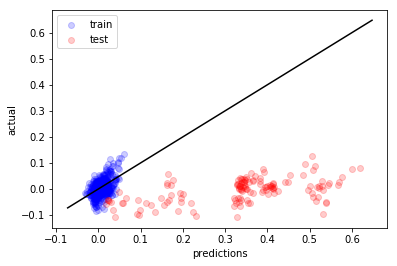

In [238]:
# Scatter the predictions vs the targets with 80% transparency
plt.scatter(train_predictions, train_targets, alpha=0.2, color='b', label='train')
plt.scatter(test_predictions, test_targets, alpha= 0.2, color='r', label='test')

# Plot the perfect prediction line
xmin, xmax = plt.xlim()
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k')

# Set the axis labels and show the plot
plt.xlabel('predictions')
plt.ylabel('actual')
plt.legend()  # show the legend
plt.show()

In [239]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
# scikit-learn:
lr = LinearRegression()
lr.fit(train_features, train_targets)

# Make predictions with our model
train_predictions = lr.predict(train_features)
test_predictions = lr.predict(test_features)

# Create a scatter plot with train and test actual vs predictions
#plt.scatter(train_targets, train_predictions, label='train')
#plt.scatter(test_targets, test_predictions, label='test')
#plt.legend()
#plt.show()

In [240]:
# Look at the R^2 scores on train and test
print(lr.score(train_features, train_targets))
print(lr.score(test_features, test_targets))

0.2839714580744024
-12.519991601260761


In [241]:
print(mean_squared_error(train_targets, train_predictions))
print(mean_squared_error(test_targets, test_predictions))


0.0006452529945055463
0.028011759580255806


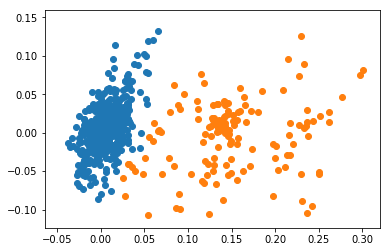

In [242]:
# Scatter the predictions vs actual values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.show()

In [243]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [244]:
scaler = StandardScaler()


scaled_train_features = scaler.fit_transform(train_features)
scaled_test_features = scaler.fit_transform(test_features)

print(linear_features.shape, scaled_train_features.shape, scaled_test_features.shape)
print(linear_features.shape, scaled_train_features.shape, scaled_test_features.shape)

(694, 33) (555, 33) (139, 33)
(694, 33) (555, 33) (139, 33)


In [245]:
# scikit-learn:
lr = LinearRegression()
lr.fit(scaled_train_features, train_targets)

# Make predictions with our model
train_predictions = lr.predict(scaled_train_features)
test_predictions = lr.predict(scaled_test_features)

# Create a scatter plot with train and test actual vs predictions
#plt.scatter(train_targets, train_predictions, label='train')
#plt.scatter(test_targets, test_predictions, label='test')
#plt.legend()
#plt.show()b

In [246]:
# Look at the R^2 scores on train and test
print(lr.score(scaled_train_features, train_targets))
print(lr.score(scaled_test_features, test_targets))

0.28397321857802094
-1.145207155416561


In [247]:
print(mean_squared_error(train_targets, train_predictions))
print(mean_squared_error(test_targets, test_predictions))
rsme_train = np.sqrt(mean_squared_error(train_targets, train_predictions))
rsme_test = np.sqrt(mean_squared_error(test_targets, test_predictions))
print('Train Root mean squared error: ' + str(rsme_train))
print('Test Root mean squared error: ' + str(rsme_test))

0.0006452514080181855
0.00444460535624664
Train Root mean squared error: 0.025401799306706316
Test Root mean squared error: 0.06666787349425989


In [248]:
column =['Prediction']
test= pd.DataFrame(test_predictions,columns=column,index=test_targets.index)
test

,Prediction
date,
2018-10-26,0.019596
2018-10-29,0.016731
2018-10-30,0.016194
2018-10-31,0.024450
2018-11-01,0.027535
2018-11-02,0.019846
2018-11-05,0.019546
2018-11-06,0.017670
2018-11-07,0.019999


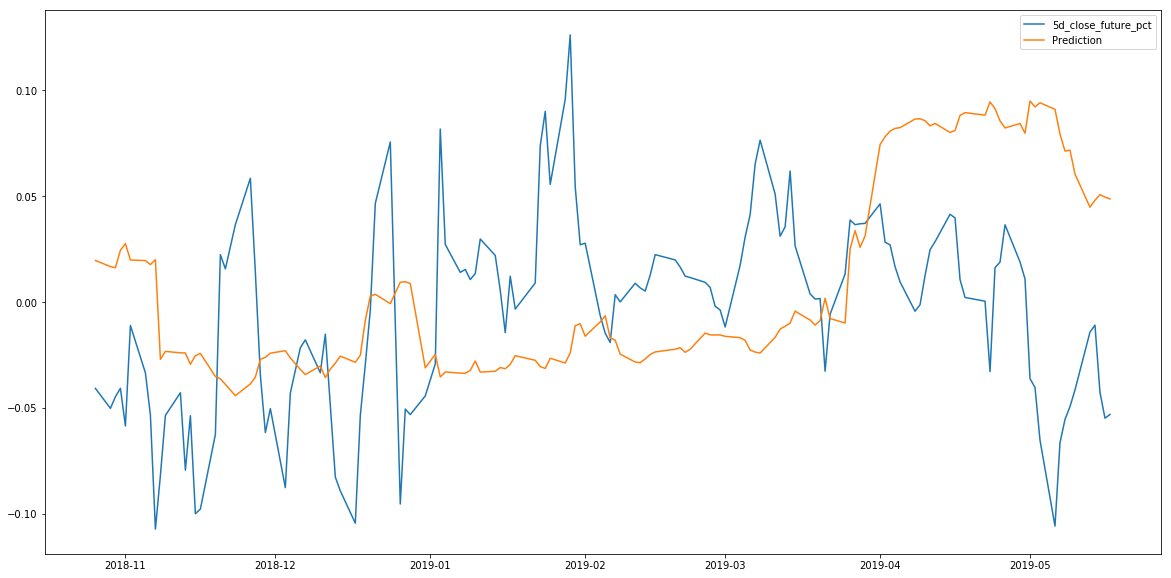

In [249]:
plt.figure(figsize=(20,10))
plt.plot(test_targets)
plt.plot(test)
plt.legend(['5d_close_future_pct','Prediction'])
plt.show()

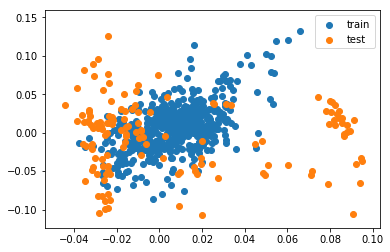

In [250]:
# Scatter the predictions vs actual values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.legend()
plt.show()

### Lasso And Ridge - https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/

In [251]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
scaler = StandardScaler()
# Fit the scaler on the training features and transform these in one go
scaled_train_features = scaler.fit_transform(train_features)

# Create the Lasso model 
la = Lasso()

# Fit it to the standardized training data
la.fit(scaled_train_features, train_targets)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [252]:
# Transform the test set with the pre-fitted scaler
scaled_test_features = scaler.transform(test_features)

# Calculate the coefficient of determination (R squared) on X_test_std
r_squared = la.score(scaled_test_features, test_targets)
print("The model can predict {0:.1%} of the variance in the test set.".format(r_squared))

# Create a list that has True values when coefficients equal 0
zero_coef = la.coef_ == 0

# Calculate how many features have a zero coefficient
n_ignored = sum(zero_coef)
print("The model has ignored {} out of {} features.".format(n_ignored, len(la.coef_)))

The model can predict -6.6% of the variance in the test set.
The model has ignored 33 out of 33 features.


In [253]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.1,normalize=True)

lassoReg.fit(train_features, train_targets)

pred = lassoReg.predict(test_features)
train_pred= lassoReg.predict(train_features)

train_score = r2_score(train_targets, train_pred)
score = r2_score(test_targets, pred)
mse = mean_squared_error(test_targets, pred)

print(train_score)
print(score)
print(mse)
print(np.sqrt(mse))

0.0
-0.06550176084654025
0.002207588587140044
0.04698498257039204


In [254]:
from sklearn.linear_model import Ridge

alphas = np.array([20,10,5,4,3,2,1.5,1,0.5,0.1,0.01,0.001,0.0001,0])
test_scores=[]
train_scores=[]

for n in alphas:
    ridgeReg = Ridge(alpha=n, normalize=True)
    ridgeReg.fit(train_features, train_targets)
    pred = ridgeReg.predict(test_features)
    train_pred= ridgeReg.predict(train_features)
    train_score = r2_score(train_targets, train_pred)
    train_scores.append(train_score)
    score = r2_score(test_targets, pred)
    test_scores.append(score)


ridge=pd.DataFrame(data=test_scores, index=alphas)

ridge

,0
20.0000,-9.204779e-02
10.0000,-1.220279e-01
5.0000,-1.769818e-01
4.0000,-2.014164e-01
3.0000,-2.384929e-01
2.0000,-3.029393e-01
1.5000,-3.591692e-01
1.0000,-4.581278e-01
0.5000,-7.098695e-01
0.1000,-2.204756e+00


In [277]:
ridgeReg = Ridge(alpha=10, normalize=True)

ridgeReg.fit(train_features, train_targets)

pred = ridgeReg.predict(test_features)
train_pred= ridgeReg.predict(train_features)

train_score = r2_score(train_targets, train_pred)
score = r2_score(test_targets, pred)
mse = mean_squared_error(test_targets, test_predictions)

print('Train r2: ' + str(train_score))
print('Test r2: ' + str(score))
#print(mse)
#print(np.sqrt(mse))

Train r2: 0.02648616693717687
Test r2: -0.12202786475024174


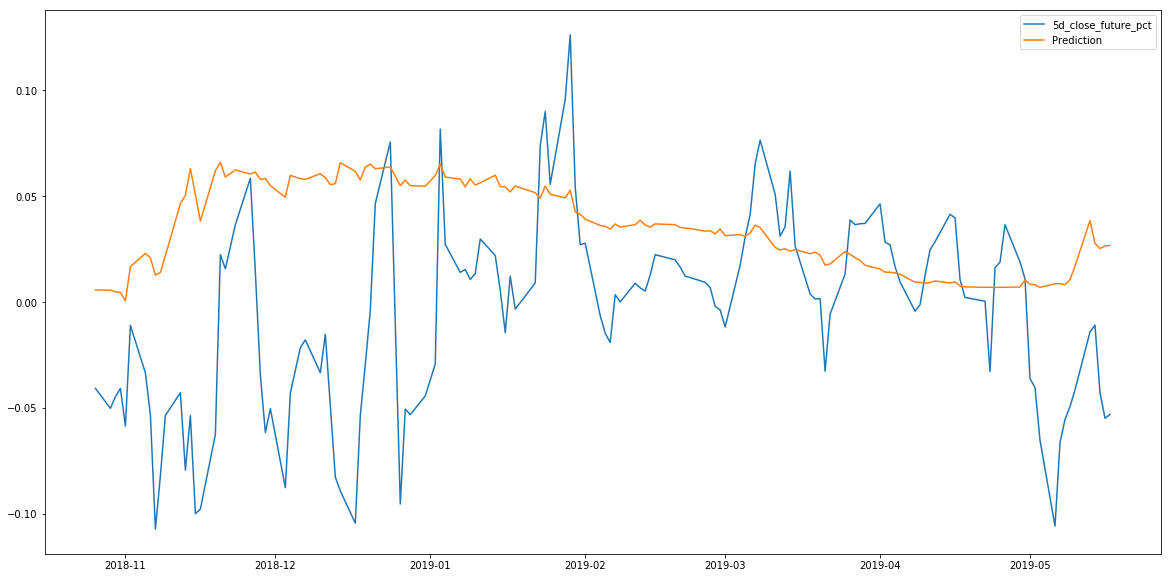

In [279]:
column =['Prediction']
rfr_pred= pd.DataFrame(test_predictions,columns=column,index=test_targets.index)


plt.figure(figsize=(20,10))
plt.plot(test_targets)
plt.plot(rfr_pred)
plt.legend(['5d_close_future_pct','Prediction'])
plt.show()

In [256]:
from sklearn.linear_model import ElasticNet

ENreg = ElasticNet(alpha=0.5, l1_ratio=1, normalize=False)

ENreg.fit(train_features,train_targets)

pred_cv = ENreg.predict(test_features)
train_pred= ENreg.predict(train_features)

train_score = r2_score(train_targets, train_pred)
score = r2_score(test_targets, pred_cv)
mse = mean_squared_error(test_targets, pred_cv)

print('Train r2: ' + str(train_score))
print('Test r2: ' + str(score))
#print(mse)
#print(np.sqrt(mse))

Train r2: 0.09925106584715315
Test r2: -0.9742612530602457


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


### PLS - https://www.idtools.com.au/partial-least-squares-regression-python/

In [257]:
#S basic codePython
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define PLS object
pls = PLSRegression(n_components=1)

# Fit
pls.fit(scaled_train_features, train_targets)

# Prediction
train_predicitions = pls.predict(scaled_train_features)
test_predicitions = pls.predict(scaled_test_features)

# Calculate scores
train_score = r2_score(train_targets,train_predictions)
score = r2_score(test_targets, test_predictions)
mse = mean_squared_error(test_targets, test_predictions)

print('Train r2: ' + str(train_score))
print('Test r2: ' + str(score))
print(mse)
print(np.sqrt(mse))


Train r2: 0.28397321857802094
Test r2: -1.145207155416561
0.00444460535624664
0.06666787349425989


In [258]:
from sys import stdout
 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
from scipy.signal import savgol_filter
 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, r2_score

In [259]:
X_calib = scaled_train_features
Y_calib = train_targets
X_valid = scaled_test_features
Y_valid = test_targets

def prediction(X_calib, Y_calib, X_valid, Y_valid, plot_components=False):
 
    #Run PLS including a variable number of components, up to 40,  and calculate MSE
    mse = []
    component = np.arange(1, 29)
    for i in component:
        pls = PLSRegression(n_components=i)
        # Fit
        pls.fit(train_features, Y_calib)
        # Prediction
        Y_pred = pls.predict(X_valid)
 
        mse_p = mean_squared_error(Y_valid, Y_pred)
        mse.append(mse_p)
 
        comp = 100*(i+1)/40
        # Trick to update status on the same line
        stdout.write("\r%d%% completed" % comp)
        stdout.flush()
    stdout.write("\n")
 
    # Calculate and print the position of minimum in MSE
    msemin = np.argmin(mse)
    print("Suggested number of components: ", msemin+1)
    stdout.write("\n")
 
    if plot_components is True:
        with plt.style.context(('ggplot')):
            plt.plot(component, np.array(mse), '-v', color = 'blue', mfc='blue')
            plt.plot(component[msemin], np.array(mse)[msemin], 'P', ms=10, mfc='red')
            plt.xlabel('Number of PLS components')
            plt.ylabel('MSE')
            plt.title('PLS')
            plt.xlim(xmin=-1)
 
        plt.show()
    # Run PLS with suggested number of components
    pls = PLSRegression(n_components=msemin+1)
    pls.fit(train_features, Y_calib)
    Y_pred = pls.predict(X_valid) 
    
    # Calculate and print scores
    score_p = r2_score(Y_valid, Y_pred)
    mse_p = mean_squared_error(Y_valid, Y_pred)
    sep = np.std(Y_pred[:,0]-Y_valid)
    rpd = np.std(Y_valid)/sep
    bias = np.mean(Y_pred[:,0]-Y_valid)
    
    print('R2: %5.3f'  % score_p)
    print('MSE: %5.3f' % mse_p)
    print('SEP: %5.3f' % sep)
    print('RPD: %5.3f' % rpd)
    print('Bias: %5.3f' %  bias)
 
    # Plot regression and figures of merit
    rangey = max(Y_valid) - min(Y_valid)
    rangex = max(Y_pred) - min(Y_pred)
 
    z = np.polyfit(Y_valid, Y_pred, 1)
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))
        ax.scatter(Y_pred, Y_valid, c='red', edgecolors='k')
        ax.plot(z[1]+z[0]*Y_valid, Y_valid, c='blue', linewidth=1)
        ax.plot(Y_valid, Y_valid, color='green', linewidth=1)
        plt.xlabel('Predicted')
        plt.ylabel('Measured')
        plt.title('Prediction')
 
        # Print the scores on the plot
        plt.text(min(Y_pred)+0.05*rangex, max(Y_valid)-0.1*rangey, 'R$^{2}=$ %5.3f'  % score_p)
        plt.text(min(Y_pred)+0.05*rangex, max(Y_valid)-0.15*rangey, 'MSE: %5.3f' % mse_p)
        plt.text(min(Y_pred)+0.05*rangex, max(Y_valid)-0.2*rangey, 'SEP: %5.3f' % sep)
        plt.text(min(Y_pred)+0.05*rangex, max(Y_valid)-0.25*rangey, 'RPD: %5.3f' % rpd)
        plt.text(min(Y_pred)+0.05*rangex, max(Y_valid)-0.3*rangey, 'Bias: %5.3f' %  bias)
        plt.show()

72% completed
Suggested number of components:  1

R2: -43.637
MSE: 0.092
SEP: 0.267
RPD: 0.171
Bias: 0.146


/anaconda3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:317: UserWarning: X scores are null at iteration 24
  warnings.warn('X scores are null at iteration %s' % k)
/anaconda3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:317: UserWarning: X scores are null at iteration 24
  warnings.warn('X scores are null at iteration %s' % k)
/anaconda3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:317: UserWarning: X scores are null at iteration 24
  warnings.warn('X scores are null at iteration %s' % k)
/anaconda3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:317: UserWarning: X scores are null at iteration 24
  warnings.warn('X scores are null at iteration %s' % k)


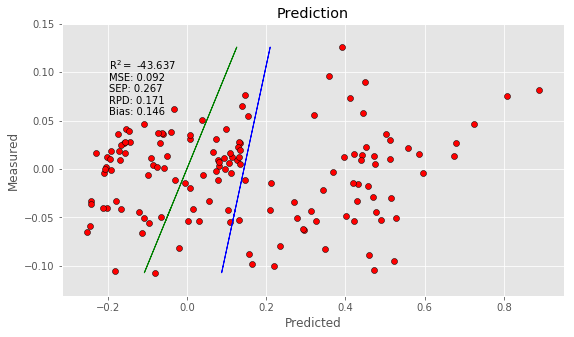

In [260]:
prediction(X_calib, Y_calib, X_valid, Y_valid, plot_components=False)

### PCA

[ 46.71  62.8   76.24  81.63  85.96  90.07  92.87  94.84  96.53  97.9
  98.45  98.89  99.16  99.41  99.56  99.68  99.77  99.84  99.88  99.92
  99.96  99.98 100.   100.   100.   100.   100.   100.   100.   100.
 100.   100.   100.  ]
0.24284171953199885
-0.23390048865194668
0.0025564900373795624
0.05056174480157466


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


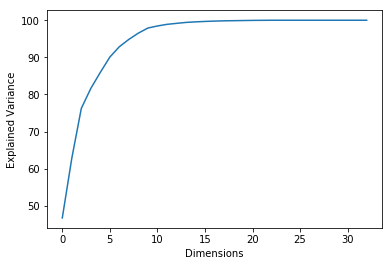

In [261]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
%matplotlib inline

#convert it to numpy arrays
X=train_features
X_test=test_features

#Scaling the values
X = scale(X)
X_test=scale(X_test)

pca = PCA(n_components=33)

pca.fit(X)

#The amount of variance that each PC explains
var= pca.explained_variance_ratio_



#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

print(var1)

plt.plot(var1)
plt.xlabel('Dimensions')
plt.ylabel('Explained Variance')

#Looking at above plot I'm taking 30 variables
pca = PCA(n_components=20)
pca.fit(X)
X1=pca.fit_transform(X)
X1_test=pca.fit_transform(X_test)

from sklearn import linear_model
regr = linear_model.LinearRegression() 

y = train_targets
regr.fit(X1,y)
pred=regr.predict(X1)
y_pred=regr.predict(X1_test)


train_score = r2_score(train_targets, pred)
score = r2_score(test_targets, y_pred)
mse = mean_squared_error(test_targets, y_pred)

print(train_score)
print(score)
print(mse)
print(np.sqrt(mse))

### Decision Tree

In [262]:
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree = DecisionTreeRegressor()

# Fit the model to the training features and targets
decision_tree.fit(train_features, train_targets)

# Check the score on train and test
print(decision_tree.score(train_features, train_targets))
print(decision_tree.score(test_features, test_targets))

0.9999953097731736
-5.526048827037122


In [263]:
#Scaled Data
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree = DecisionTreeRegressor()

# Fit the model to the training features and targets
decision_tree.fit(scaled_train_features, train_targets)

# Check the score on train and test
print(decision_tree.score(scaled_train_features, train_targets))
print(decision_tree.score(scaled_test_features, test_targets))

0.9999953097731736
-4.831412842698382


In [264]:
for d in [3,5,10]:
    # Create the tree and fit it
    decision_tree = DecisionTreeRegressor(max_depth=d,random_state=42)
    decision_tree.fit(train_features,train_targets)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree.score(train_features, train_targets))
    print(decision_tree.score(test_features, test_targets), '\n')

max_depth= 3
0.29718620764614545
-3.425492817401592 

max_depth= 5
0.44432330384233276
-4.910896067016176 

max_depth= 10
0.9101106553601487
-5.3146731821993844 



In [265]:
#Scaled Data
for d in [3,5,10]:
    # Create the tree and fit it
    decision_tree = DecisionTreeRegressor(max_depth=d,random_state=42)
    decision_tree.fit(train_features,train_targets)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree.score(scaled_train_features, train_targets))
    print(decision_tree.score(scaled_test_features, test_targets), '\n')

max_depth= 3
-0.9413959194919459
-3.651512791689165 

max_depth= 5
-1.2987589902244165
-5.15766590627886 

max_depth= 10
-1.968298904371376
-5.141984357528389 



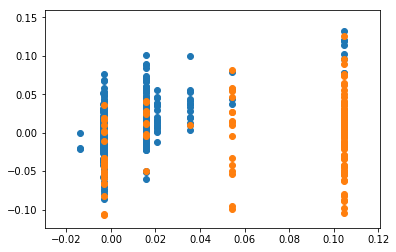

In [266]:
# Use the best max_depth of 3 from last exercise to fit a decision tree
decision_tree = DecisionTreeRegressor(max_depth=3)
decision_tree.fit(train_features, train_targets)

# Predict values for train and test
train_predictions = decision_tree.predict(train_features)
test_predictions = decision_tree.predict(test_features)

# Scatter the predictions vs actual values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.show()

### Random Forest

In [267]:
from sklearn.ensemble import RandomForestRegressor

# Create the random forest model and fit to the training data
rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(train_features, train_targets)

# Look at the R^2 scores on train and test
print(rfr.score(train_features, train_targets))
print(rfr.score(test_features, test_targets))

0.9348222899642278
-2.9125909485336883


Usually, we can use sklearn's GridSearchCV() method to search hyperparameters, but with a financial time series, we don't want to do cross-validation due to data mixing. We want to fit our models on the oldest data and evaluate on the newest data. So we'll use sklearn's ParameterGrid to create combinations of hyperparameters to search.

In [268]:
from sklearn.model_selection import ParameterGrid

# Create a dictionary of hyperparameters to search
grid = {'n_estimators':[200], 'max_depth': [3], 'max_features': [4,28], 'random_state': [42]}
test_scores = []

# Loop through the parameter grid, set the hyperparameters, and save the scores
for g in ParameterGrid(grid):
    rfr.set_params(**g)  # ** is "unpacking" the dictionary
    rfr.fit(train_features, train_targets)
    test_scores.append(rfr.score(test_features, test_targets))

# Find best hyperparameters from the test score and print
best_idx = np.argmax(test_scores)
print(test_scores[best_idx], ParameterGrid(grid)[best_idx])

-0.9054826314086442 {'random_state': 42, 'n_estimators': 200, 'max_features': 4, 'max_depth': 3}


In [269]:
rfr = RandomForestRegressor(n_estimators=200,max_features=4,max_depth=3,random_state=42)
rfr.fit(train_features, train_targets)

# Look at the R^2 scores on train and test
print(rfr.score(train_features, train_targets))
print(rfr.score(test_features, test_targets))

0.2548632060849304
-0.9054826314086442


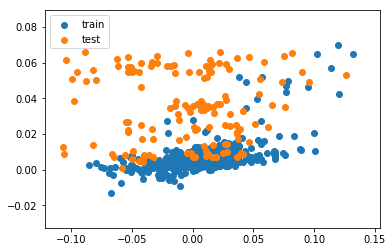

In [281]:
# Use the best hyperparameters from before to fit a random forest model
rfr = RandomForestRegressor(n_estimators=200, max_depth=3, max_features=4, random_state=42)
rfr.fit(train_features, train_targets)

# Make predictions with our model
train_predictions = rfr.predict(train_features)
test_predictions = rfr.predict(test_features)

# Create a scatter plot with train and test actual vs predictions
plt.scatter(train_targets, train_predictions, label='train')
plt.scatter(test_targets, test_predictions, label='test')
plt.legend()
plt.show()

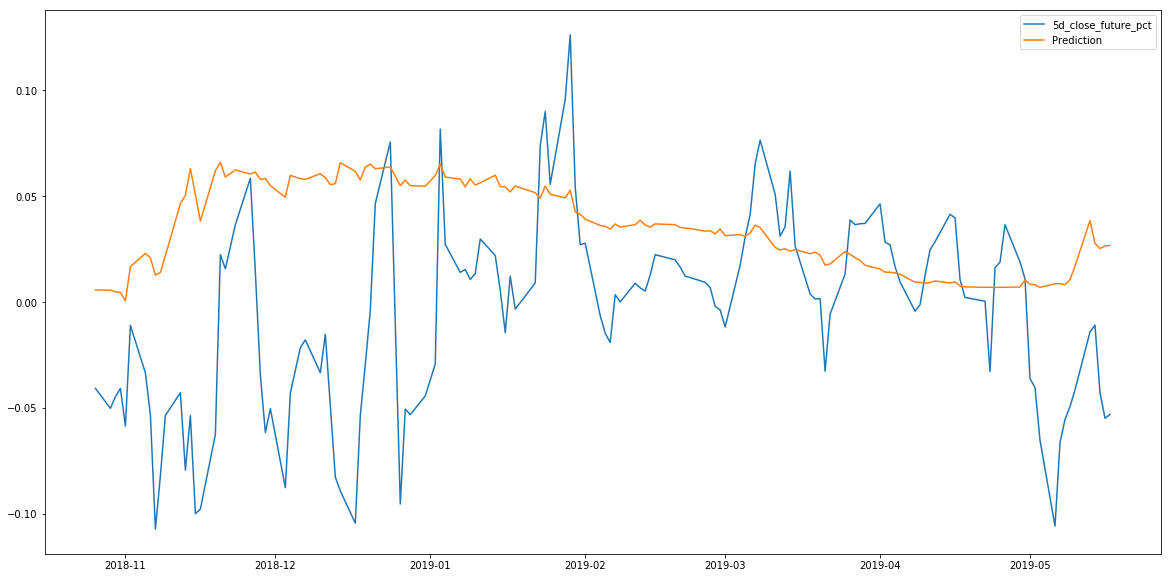

In [282]:
column =['Prediction']
rfr_pred= pd.DataFrame(test_predictions,columns=column,index=test_targets.index)


plt.figure(figsize=(20,10))
plt.plot(test_targets)
plt.plot(rfr_pred)
plt.legend(['5d_close_future_pct','Prediction'])
plt.show()

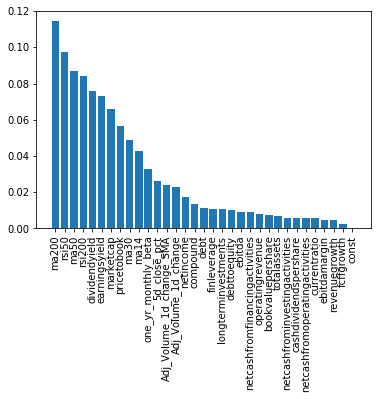

In [271]:
# Get feature importances from our random forest model
importances = rfr.feature_importances_

# Get the index of importances from greatest importance to least
sorted_index = np.argsort(importances)[::-1]
x = range(len(importances))
#x = range(features.shape)
# Create tick labels 
#labels = np.array(feature_names)[sorted_index]
labels = [linear_features.columns[i] for i in sorted_index]
plt.bar(x, importances[sorted_index], tick_label=labels)

# Rotate tick labels to vertical

plt.xticks(rotation=90)
plt.show()

In [272]:
from sklearn.ensemble import GradientBoostingRegressor

# Create GB model -- hyperparameters have already been searched for you
gbr = GradientBoostingRegressor(max_features=3,
                                learning_rate=0.01,
                                n_estimators=200,
                                subsample=0.6,
                                random_state=42)
gbr.fit(train_features,train_targets)

train_predictions = gbr.predict(train_features)
test_predictions = gbr.predict(test_features)

print(gbr.score(train_features, train_targets))
print(gbr.score(test_features,test_targets))

0.34259073140365737
-1.1884614899010297


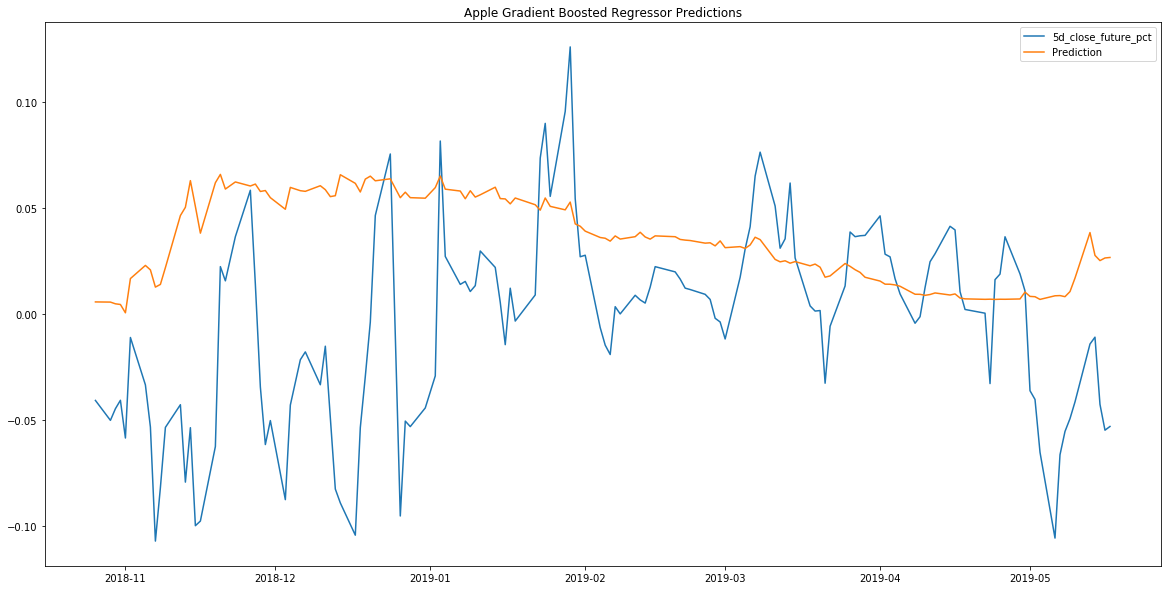

In [284]:
column =['Prediction']
gbr_pred= pd.DataFrame(test_predictions,columns=column,index=test_targets.index)


plt.figure(figsize=(20,10))
plt.plot(test_targets)
plt.plot(gbr_pred)
plt.legend(['5d_close_future_pct','Prediction'])
plt.title('Apple Gradient Boosted Regressor Predictions')
plt.show()

In [ ]:
# Sort feature importances in descending order
#indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
#names = [iris.feature_names[i] for i in indices]

# Create plot
#plt.figure()

# Create plot title
#plt.title("Feature Importance")

# Add bars
#plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
#plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
#plt.show()

In [ ]:
# Extract feature importances from the fitted gradient boosting model
feature_importances = gbr.feature_importances_

# Get the indices of the largest to smallest feature importances
sorted_index = np.argsort(feature_importances)[::-1]
x = range(len(feature_importances))

# Create tick labels 
#labels = np.array(feature_names)[sorted_index]
labels = [linear_features.columns[i] for i in sorted_index]
plt.bar(x, feature_importances[sorted_index], tick_label=labels)

# Set the tick lables to be the feature names, according to the sorted feature_idx
plt.xticks(rotation=90)
plt.show()

### K Nearest Neighbour

In [ ]:


# Standardize the train and test features
scaled_train_features = scale(train_features)
scaled_test_features = scale(test_features)

# Plot histograms of the 14-day SMA RSI before and after scaling
f, ax = plt.subplots(nrows=2, ncols=1)
train_features.iloc[:, 2].hist(ax=ax[0])
ax[1].hist(scaled_train_features[:, 2])
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

for n in range(2, 20):
    # Create and fit the KNN model
    knn = KNeighborsRegressor(n_neighbors=n)
    
    # Fit the model to the training data
    knn.fit(scaled_train_features, train_targets)
    
    # Print number of neighbors and the score to find the best value of n
    print("n_neighbors =", n)
    print('train, test scores')
    print(knn.score(scaled_train_features, train_targets))
    print(knn.score(scaled_test_features, test_targets))
    print()  # prints a blank line

In [ ]:
# Create the model with the best-performing n_neighbors of 5
knn = KNeighborsRegressor(n_neighbors=17)

# Fit the model
knn.fit(scaled_train_features, train_targets)

# Get predictions for train and test sets
train_predictions = knn.predict(scaled_train_features)
test_predictions = knn.predict(scaled_test_features)

# Plot the actual vs predicted values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.legend()
plt.show()

### Neural Network 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Create the model
model_1 = Sequential()
model_1.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_1.add(Dense(20, activation='relu'))
model_1.add(Dense(1, activation='linear'))

# Fit the model
model_1.compile(optimizer='adam', loss='mse')
history = model_1.fit(scaled_train_features, train_targets, epochs=25)

In [ ]:
# Plot the losses from the fit
plt.plot(history.history['loss'])

# Use the last loss as the title
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

In [ ]:
from sklearn.metrics import r2_score

# Calculate R^2 score
train_preds = model_1.predict(scaled_train_features)
test_preds = model_1.predict(scaled_test_features)
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Plot predictions vs actual
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds,test_targets, label='test')
plt.legend()
plt.show()

In [ ]:
import keras.losses
import tensorflow as tf

# Create loss function
def sign_penalty(y_true, y_pred):
    penalty = 100.
    loss = tf.where(tf.less(y_true * y_pred, 0), \
                     penalty * tf.square(y_true - y_pred), \
                     tf.square(y_true - y_pred))

    return tf.reduce_mean(loss, axis=-1)

keras.losses.sign_penalty = sign_penalty  # enable use of loss with keras
print(keras.losses.sign_penalty)

In [ ]:
# Create the model
model_2 = Sequential()
model_2.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_2.add(Dense(20, activation='relu'))
model_2.add(Dense(1, activation='linear'))

# Fit the model with our custom 'sign_penalty' loss function
model_2.compile(optimizer='adam', loss=sign_penalty)
history = model_2.fit(scaled_train_features, train_targets, epochs=25)
plt.plot(history.history['loss'])
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

In [ ]:
# Evaluate R^2 scores
train_preds = model_2.predict(scaled_train_features)
test_preds = model_2.predict(scaled_test_features)
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Scatter the predictions vs actual -- this one is interesting!
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds, test_targets, label= 'test')  # plot test set
plt.legend(); plt.show()

In [ ]:
from keras.layers import Dropout

# Create model with dropout
model_3 = Sequential()
model_3.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_3.add(Dropout(0.2))
model_3.add(Dense(20, activation='relu'))
model_3.add(Dense(1, activation='linear'))

# Fit model with mean squared error loss function
model_3.compile(optimizer='adam', loss='mse')
history = model_3.fit(scaled_train_features, train_targets, epochs=25)
plt.plot(history.history['loss'])
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

In [ ]:
# Make predictions from the 3 neural net models
train_pred1 = model_1.predict(scaled_train_features)
test_pred1 = model_1.predict(scaled_test_features)

train_pred2 = model_2.predict(scaled_train_features)
test_pred2 = model_2.predict(scaled_test_features)

train_pred3 = model_3.predict(scaled_train_features)
test_pred3 = model_3.predict(scaled_test_features)

# Horizontally stack predictions and take the average across rows
train_preds = np.mean(np.hstack((train_pred1, train_pred2, train_pred3)), axis=1)
test_preds = np.mean(np.hstack((test_pred1,test_pred2, test_pred3)), axis=1)
print(test_preds[-5:])

In [ ]:
from sklearn.metrics import r2_score

# Evaluate the R^2 scores
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Scatter the predictions vs actual -- this one is interesting!
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds, test_targets, label='test')
plt.legend(); plt.show()

### Results Summary DF

In [149]:
Models= ['Linear Regression','Lasso','Ridge','Elastic Net','PLS','PCA','Decision Tree','Random Forest','GBR','KNN','NN1','NN2','NN3']
df_results = pd.DataFrame({"Training":'', 
                         "Test":''},index=Models)


In [150]:
Models= ['Linear Regression','Lasso','Ridge','Elastic Net','PLS','PCA','Decision Tree','Random Forest','GBR','KNN','NN1','NN2','NN3']
rmse_results = pd.DataFrame({"Training":[np.sqrt(mean_squared_error(train_targets, train_predictions))], 
          "Test":[np.sqrt(mean_squared_error(test_targets, test_predictions))]},index=Models)


In [151]:
from sklearn.linear_model import LinearRegression
# scikit-learn:
scaler = StandardScaler()

scaled_train_features = scaler.fit_transform(train_features)
scaled_test_features = scaler.fit_transform(test_features)


lr = LinearRegression()
lr.fit(scaled_train_features, train_targets)

# Make predictions with our model
train_predictions = lr.predict(scaled_train_features)
test_predictions = lr.predict(scaled_test_features)



train_score = r2_score(train_targets, train_predictions)
score = r2_score(test_targets, test_predictions)

rmse = np.sqrt(mean_squared_error(test_targets, test_predictions))
train_rmse=np.sqrt(mean_squared_error(train_targets, train_predictions))

df_results.loc['Linear Regression']['Training']=train_score
df_results.loc['Linear Regression']['Test']=score
rmse_results.loc['Linear Regression']['Training']=train_rmse
rmse_results.loc['Linear Regression']['Test']=rmse

In [152]:
from sklearn.linear_model import Lasso
la = Lasso(alpha=0.01)
# Fit it to the standardized training data
la.fit(scaled_train_features, train_targets)
pred = la.predict(test_features)
train_pred= la.predict(train_features)

train_score = r2_score(train_targets, train_pred)
score = r2_score(test_targets, pred)
rmse = np.sqrt(mean_squared_error(test_targets, pred))
train_rmse=np.sqrt(mean_squared_error(train_targets, train_pred))

df_results.loc['Lasso']['Training']=train_score
df_results.loc['Lasso']['Test']=score
rmse_results.loc['Lasso']['Training']=train_rmse
rmse_results.loc['Lasso']['Test']=rmse

In [153]:
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=3, normalize=True)

ridgeReg.fit(train_features, train_targets)

pred = ridgeReg.predict(test_features)
train_pred= ridgeReg.predict(train_features)

train_score = r2_score(train_targets, train_pred)
score = r2_score(test_targets, pred)
rmse = np.sqrt(mean_squared_error(test_targets, pred))
train_rmse = np.sqrt(mean_squared_error(train_targets, train_pred))
               
df_results.loc['Ridge']['Training']=train_score
df_results.loc['Ridge']['Test']=score
rmse_results.loc['Ridge']['Training']=train_rmse
rmse_results.loc['Ridge']['Test']=rmse



In [154]:
from sklearn.linear_model import ElasticNet

ENreg = ElasticNet(alpha=1, l1_ratio=1, normalize=True)

ENreg.fit(train_features,train_targets)

test_predictions = ENreg.predict(test_features)
train_predictions= ENreg.predict(train_features)

train_score = r2_score(train_targets, train_predictions)
score = r2_score(test_targets, test_predictions)

rmse = np.sqrt(mean_squared_error(test_targets, test_predictions))
train_rmse=np.sqrt(mean_squared_error(train_targets, train_predictions))
df_results.loc['Elastic Net']['Training']=train_score
df_results.loc['Elastic Net']['Test']=score
rmse_results.loc['Elastic Net']['Training']=train_rmse
rmse_results.loc['Elastic Net']['Test']=rmse

In [155]:
#S basic codePython
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define PLS object
pls = PLSRegression(n_components=1,scale=True)

# Fit
pls.fit(train_features, train_targets)

# Prediction
train_predicitions = pls.predict(train_features)
test_predicitions = pls.predict(test_features)
rmse = np.sqrt(mean_squared_error(test_targets, test_predictions))
train_rmse=np.sqrt(mean_squared_error(train_targets, train_predictions))

df_results.loc['PLS']['Training']=train_score
df_results.loc['PLS']['Test']=score
rmse_results.loc['PLS']['Training']=train_rmse
rmse_results.loc['PLS']['Test']=rmse

In [156]:
from sklearn.decomposition import PCA
X=train_features
X_test=test_features
X = scale(X)
X_test=scale(X_test)

# Reduce dimensions based off variance curve
pca = PCA(n_components=15)
pca.fit(X)
X1=pca.fit_transform(X)
X1_test=pca.fit_transform(X_test)

y = train_targets
lr.fit(X1,y)
pred=lr.predict(X1)
y_pred=lr.predict(X1_test)


train_score = r2_score(train_targets, pred)
score = r2_score(test_targets, y_pred)
rmse = np.sqrt(mean_squared_error(test_targets, y_pred))
train_rmse=np.sqrt(mean_squared_error(train_targets, pred))

df_results.loc['PCA']['Training']=train_score
df_results.loc['PCA']['Test']=score
rmse_results.loc['PCA']['Training']=train_rmse
rmse_results.loc['PCA']['Test']=rmse

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [157]:
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree = DecisionTreeRegressor(max_depth=3,random_state=42)

# Fit the model to the training features and targets
decision_tree.fit(train_features, train_targets)

train_predictions = decision_tree.predict(train_features)
test_predictions = decision_tree.predict(test_features)

train_score = r2_score(train_targets, train_predictions)
score = r2_score(test_targets, test_predictions)
rmse = np.sqrt(mean_squared_error(test_targets, test_predictions))
train_rmse=np.sqrt(mean_squared_error(train_targets, train_predictions))

df_results.loc['Decision Tree']['Training']=train_score
df_results.loc['Decision Tree']['Test']=score
rmse_results.loc['Decision Tree']['Training']=train_rmse
rmse_results.loc['Decision Tree']['Test']=rmse

In [158]:
from sklearn.ensemble import RandomForestRegressor
#Fit model
rfr = RandomForestRegressor(n_estimators=200,max_features=4,max_depth=3,random_state=42)
rfr.fit(train_features, train_targets)

#Predict test data
train_predictions = rfr.predict(train_features)
test_predictions = rfr.predict(test_features)

#Measure performance
train_score = r2_score(train_targets, train_predictions)
score = r2_score(test_targets, test_predictions)
rmse = np.sqrt(mean_squared_error(test_targets, test_predictions))
train_rmse=np.sqrt(mean_squared_error(train_targets, train_predictions))

df_results.loc['Random Forest']['Training']=train_score
df_results.loc['Random Forest']['Test']=score
rmse_results.loc['Random Forest']['Training']=train_rmse
rmse_results.loc['Random Forest']['Test']=rmse

In [159]:
from sklearn.ensemble import GradientBoostingRegressor

# Create GB model -- hyperparameters have already been searched for you
gbr = GradientBoostingRegressor(max_features=3,
                                learning_rate=0.01,
                                n_estimators=200,
                                subsample=0.6,
                                random_state=42)

gbr.fit(train_features,train_targets)
train_predictions = gbr.predict(train_features)
test_predictions = gbr.predict(test_features)


train_score = r2_score(train_targets, train_predictions)
score = r2_score(test_targets, test_predictions)

rmse = np.sqrt(mean_squared_error(test_targets, test_predictions))
train_rmse=np.sqrt(mean_squared_error(train_targets, train_predictions))

df_results.loc['GBR']['Training']=train_score
df_results.loc['GBR']['Test']=score
rmse_results.loc['GBR']['Training']=train_rmse
rmse_results.loc['GBR']['Test']=rmse

In [160]:
from sklearn.neighbors import KNeighborsRegressor 

knn = KNeighborsRegressor(n_neighbors=3)
    
# Fit the model to the training data
knn.fit(scaled_train_features, train_targets)

# Get predictions for train and test sets
train_predictions = knn.predict(scaled_train_features)
test_predictions = knn.predict(scaled_test_features)

train_score = r2_score(train_targets, train_predictions)
score = r2_score(test_targets, test_predictions)
rmse = np.sqrt(mean_squared_error(test_targets, test_predictions))
train_rmse=np.sqrt(mean_squared_error(train_targets, train_predictions))

df_results.loc['KNN']['Training']=train_score
df_results.loc['KNN']['Test']=score
rmse_results.loc['KNN']['Training']=train_rmse
rmse_results.loc['KNN']['Test']=rmse
    

In [161]:
from keras.models import Sequential
from keras.layers import Dense

# Create the model
model_1 = Sequential()
model_1.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_1.add(Dense(20, activation='relu'))
model_1.add(Dense(1, activation='linear'))

# Fit the model
model_1.compile(optimizer='adam', loss='mse')
history = model_1.fit(scaled_train_features, train_targets, epochs=25)


train_preds = model_1.predict(scaled_train_features)
test_preds = model_1.predict(scaled_test_features)
rmse = np.sqrt(mean_squared_error(test_targets, test_preds))
train_rmse=np.sqrt(mean_squared_error(train_targets, train_preds))



df_results.loc['NN1']['Train']=(r2_score(train_targets, train_preds))
df_results.loc['NN1']['Test']=(r2_score(test_targets, test_preds))

rmse_results.loc['NN1']['Training']=train_rmse
rmse_results.loc['NN1']['Test']=rmse


Epoch 1/25
555/555 [==============================] - 0s 607us/step - loss: 0.2249
Epoch 2/25
555/555 [==============================] - 0s 26us/step - loss: 0.0349
Epoch 3/25
555/555 [==============================] - 0s 29us/step - loss: 0.0148
Epoch 4/25
555/555 [==============================] - 0s 28us/step - loss: 0.0087
Epoch 5/25
555/555 [==============================] - 0s 26us/step - loss: 0.0060
Epoch 6/25
555/555 [==============================] - 0s 23us/step - loss: 0.0047
Epoch 7/25
555/555 [==============================] - 0s 23us/step - loss: 0.0040
Epoch 8/25
555/555 [==============================] - 0s 24us/step - loss: 0.0035
Epoch 9/25
555/555 [==============================] - 0s 694us/step - loss: 0.0029
Epoch 10/25
555/555 [==============================] - 0s 28us/step - loss: 0.0025
Epoch 11/25
555/555 [==============================] - 0s 27us/step - loss: 0.0023
Epoch 12/25
555/555 [==============================] - 0s 26us/step - loss: 0.0021
Epoch 13/25

/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.364373). Check your callbacks.
  % delta_t_median)
/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.182596). Check your callbacks.
  % delta_t_median)


555/555 [==============================] - 0s 29us/step - loss: 0.0011
Epoch 22/25
555/555 [==============================] - 0s 24us/step - loss: 0.0010
Epoch 23/25
555/555 [==============================] - 0s 23us/step - loss: 9.3889e-04
Epoch 24/25
555/555 [==============================] - 0s 22us/step - loss: 9.0318e-04
Epoch 25/25
555/555 [==============================] - 0s 21us/step - loss: 8.4949e-04


In [162]:
import keras.losses
import tensorflow as tf

# Create loss function
def sign_penalty(y_true, y_pred):
    penalty = 100.
    loss = tf.where(tf.less(y_true * y_pred, 0), \
                     penalty * tf.square(y_true - y_pred), \
                     tf.square(y_true - y_pred))

    return tf.reduce_mean(loss, axis=-1)

keras.losses.sign_penalty = sign_penalty  # enable use of loss with keras
print(keras.losses.sign_penalty)

# Create the model
model_2 = Sequential()
model_2.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_2.add(Dense(20, activation='relu'))
model_2.add(Dense(1, activation='linear'))

# Fit the model with our custom 'sign_penalty' loss function
model_2.compile(optimizer='adam', loss=sign_penalty)
history = model_2.fit(scaled_train_features, train_targets, epochs=25)





train_preds = model_2.predict(scaled_train_features)
test_preds = model_2.predict(scaled_test_features)

rmse = np.sqrt(mean_squared_error(test_targets, test_preds))
train_rmse=np.sqrt(mean_squared_error(train_targets, train_preds))



df_results.loc['NN2']['Train']=(r2_score(train_targets, train_preds))
df_results.loc['NN2']['Test']=(r2_score(test_targets, test_preds))

rmse_results.loc['NN2']['Training']=train_rmse
rmse_results.loc['NN2']['Test']=rmse


<function sign_penalty at 0x1c39d2aae8>
Epoch 1/25
555/555 [==============================] - 0s 566us/step - loss: 2.9986
Epoch 2/25
555/555 [==============================] - 0s 23us/step - loss: 0.8074
Epoch 3/25
555/555 [==============================] - 0s 24us/step - loss: 0.3684
Epoch 4/25
555/555 [==============================] - 0s 31us/step - loss: 0.2142
Epoch 5/25
555/555 [==============================] - 0s 28us/step - loss: 0.1370
Epoch 6/25
555/555 [==============================] - 0s 28us/step - loss: 0.1073
Epoch 7/25
555/555 [==============================] - 0s 30us/step - loss: 0.0943
Epoch 8/25
555/555 [==============================] - 0s 25us/step - loss: 0.0662
Epoch 9/25
555/555 [==============================] - 0s 26us/step - loss: 0.0605
Epoch 10/25
555/555 [==============================] - 0s 31us/step - loss: 0.0459
Epoch 11/25
555/555 [==============================] - 0s 23us/step - loss: 0.0425
Epoch 12/25
555/555 [==============================] - 

In [163]:
from keras.layers import Dropout
# Create model with dropout
model_3 = Sequential()
model_3.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_3.add(Dropout(0.2))
model_3.add(Dense(20, activation='relu'))
model_3.add(Dense(1, activation='linear'))

# Fit model with mean squared error loss function
model_3.compile(optimizer='adam', loss='mse')
history = model_3.fit(scaled_train_features, train_targets, epochs=25)

train_preds = model_3.predict(scaled_train_features)
test_preds = model_3.predict(scaled_test_features)
rmse = np.sqrt(mean_squared_error(test_targets, test_preds))
train_rmse=np.sqrt(mean_squared_error(train_targets, train_preds))



df_results.loc['NN3']['Train']=(r2_score(train_targets, train_preds))
df_results.loc['NN3']['Test']=(r2_score(test_targets, test_preds))

rmse_results.loc['NN3']['Training']=train_rmse
rmse_results.loc['NN3']['Test']=rmse


Epoch 1/25
555/555 [==============================] - 0s 626us/step - loss: 0.2812
Epoch 2/25
555/555 [==============================] - 0s 26us/step - loss: 0.0665
Epoch 3/25
555/555 [==============================] - 0s 25us/step - loss: 0.0310
Epoch 4/25
555/555 [==============================] - 0s 31us/step - loss: 0.0231
Epoch 5/25
555/555 [==============================] - 0s 28us/step - loss: 0.0206
Epoch 6/25
555/555 [==============================] - 0s 27us/step - loss: 0.0160
Epoch 7/25
555/555 [==============================] - 0s 30us/step - loss: 0.0138
Epoch 8/25
555/555 [==============================] - 0s 29us/step - loss: 0.0131
Epoch 9/25
555/555 [==============================] - 0s 31us/step - loss: 0.0103
Epoch 10/25
555/555 [==============================] - 0s 28us/step - loss: 0.0108
Epoch 11/25
555/555 [==============================] - 0s 28us/step - loss: 0.0094
Epoch 12/25
555/555 [==============================] - 0s 31us/step - loss: 0.0080
Epoch 13/25


In [164]:
df_results.round(3)

,Training,Test
Linear Regression,0.283973,-1.14521
Lasso,0,-0.0655018
Ridge,0.0488519,-0.238493
Elastic Net,0,-0.0655018
PLS,0,-0.0655018
PCA,0.150904,-0.234663
Decision Tree,0.297186,-3.42549
Random Forest,0.254863,-0.905483
GBR,0.342591,-1.18846
KNN,0.669243,-0.31402


Text(0.5,1,'Apple R Squared 5 Day Model Performance')

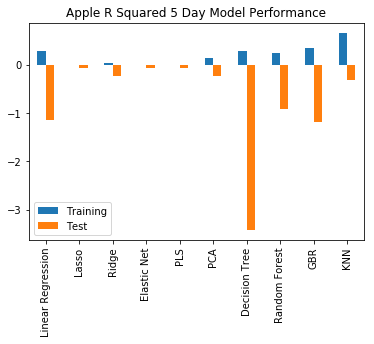

In [165]:

df_results.iloc[:-3:].plot(kind='bar')
plt.title('Apple R Squared 5 Day Model Performance')

In [166]:
rmse_results.round(4)

,Training,Test
Linear Regression,0.0254,0.0667
Lasso,0.0300,0.0470
Ridge,0.0293,0.0507
Elastic Net,0.0300,0.0470
PLS,0.0300,0.0470
PCA,0.0277,0.0506
Decision Tree,0.0252,0.0958
Random Forest,0.0259,0.0628
GBR,0.0243,0.0673
KNN,0.0173,0.0522


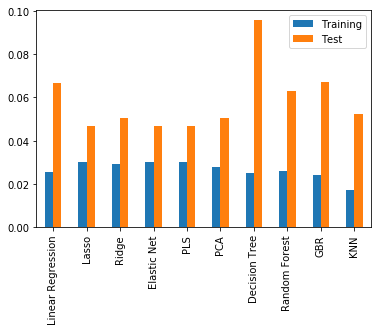

In [167]:
rmse_results.round(4).iloc[:-3:].plot(kind='bar')